<br>
<br>
<br>
<br>

# AR용 데이터 - 위치데이터

---

In [165]:
import pandas as pd
import numpy as np
pd.set_option('max_columns',999)

import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm
import seaborn as sns
sns.set() 
%matplotlib inline 
%config InlineBackend.figure_format = 'retina' 
sns.set_style(style='white')
sns.set_context(context ='paper')

import datetime
import os

In [2]:
font_path = 'NanumSquareRoundR.ttf'
fontprop = fm.FontProperties(fname=font_path) # 얘네는 한번 선언만 하면 됨

In [3]:
# 위치데이터와 앱 사용 데이터

sample_Location = pd.read_table('Bigdata_2_sample_Location.txt', error_bad_lines=False)
sample_AppUsage_usage_app_list = pd.read_table('Bigdata_3_sample_AppUsage_usage_app_list.txt', error_bad_lines=False)
sample_AppUsage_usage_sum_time = pd.read_table('Bigdata_3_sample_AppUsage_usage_sum_time.txt', error_bad_lines=False, encoding='cp949')

# 설문 데이터

PS_Question_1 = pd.read_csv('PS_Question_1.csv', encoding='cp949')
PS_Question_2 = pd.read_csv('PS_Question_2.csv', encoding='cp949')
PS_mobile = pd.read_csv('PS_mobile.csv', encoding='cp949')
PS_job = pd.read_csv('PS_job.csv', encoding='cp949')
PS_home = pd.read_csv('PS_home.csv', encoding='cp949')
PS_family = pd.read_csv('PS_family.csv', encoding='cp949')

b'Skipping line 1095006: expected 21 fields, saw 22\nSkipping line 1095049: expected 21 fields, saw 22\nSkipping line 1096034: expected 21 fields, saw 22\n'
b'Skipping line 1140315: expected 21 fields, saw 22\n'
b'Skipping line 1234278: expected 21 fields, saw 22\nSkipping line 1236082: expected 21 fields, saw 22\nSkipping line 1238545: expected 21 fields, saw 22\nSkipping line 1238702: expected 21 fields, saw 22\nSkipping line 1238915: expected 21 fields, saw 22\nSkipping line 1242722: expected 21 fields, saw 22\n'
b'Skipping line 1256857: expected 21 fields, saw 22\nSkipping line 1256897: expected 21 fields, saw 22\nSkipping line 1256931: expected 21 fields, saw 22\nSkipping line 1257047: expected 21 fields, saw 22\nSkipping line 1257330: expected 21 fields, saw 22\nSkipping line 1257389: expected 21 fields, saw 22\nSkipping line 1257406: expected 21 fields, saw 22\n'
b'Skipping line 1350974: expected 21 fields, saw 22\n'
b'Skipping line 1450488: expected 21 fields, saw 22\nSkipping 

b'Skipping line 19664155: expected 8 fields, saw 9\n'
b'Skipping line 25067048: expected 8 fields, saw 9\nSkipping line 25067220: expected 8 fields, saw 9\nSkipping line 25067390: expected 8 fields, saw 9\nSkipping line 25067560: expected 8 fields, saw 9\nSkipping line 25067730: expected 8 fields, saw 9\nSkipping line 25067900: expected 8 fields, saw 9\nSkipping line 25068071: expected 8 fields, saw 9\n'
b'Skipping line 28225246: expected 8 fields, saw 9\nSkipping line 28225424: expected 8 fields, saw 9\nSkipping line 28225608: expected 8 fields, saw 9\nSkipping line 28225793: expected 8 fields, saw 9\nSkipping line 28225975: expected 8 fields, saw 9\nSkipping line 28226157: expected 8 fields, saw 9\nSkipping line 28226337: expected 8 fields, saw 9\nSkipping line 28226518: expected 8 fields, saw 9\nSkipping line 28226698: expected 8 fields, saw 9\nSkipping line 28226879: expected 8 fields, saw 9\nSkipping line 28227066: expected 8 fields, saw 9\nSkipping line 28227259: expected 8 field

<br>
<br>
<br>
<br>

# sample_Location

<br>
null값이 적은 컬럼에 한하여 EDA 진행

---

In [4]:
sample_Location.head()

,idx,time,pid,placename,in_near,category,address,floor,lat,lng,loplat_id,place_tag,zipcode,area_name,area_tag,complex_name,complex_branch,area_id,area_lat,area_lng,complex_id
0,4,2017-09-06 08:44:43.000,H0123900,서울5호선,In,Subway Train,서울특별시 중구 회현동,-1.0,37.555104,126.970778,92237.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6,2017-09-06 08:45:12.000,I0274841,메디넷영동의원,Near,Others(Hospital),서울특별시 강남구 역삼1동,2.0,37.491746,127.030987,70186.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,9,2017-09-06 09:02:05.000,I0274841,하나투어,Near,Travel Agency,서울특별시 강남구 역삼1동,16.0,37.491819,127.031087,70183.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,20,2017-09-06 16:37:46.000,P0069737,서울3호선 안국역,In,Subway Station,서울특별시 종로구 종로1.2.3.4가동,-3.0,37.576556,126.985591,102318.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,21,2017-09-06 16:40:57.000,P0053069,우리은행,Near,Bank,서울 동작구 노량진동 42-11,1.0,37.513165,126.937856,29984.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# 3,641,462개의 row

len(sample_Location)

3641462

In [5]:
# 총 18463명의 패널 데이터가 존재

sample_Location['pid'].nunique()

18463

In [6]:
# 각 컬럼별 결측치 비율 확인
# 약 15%의 데이터는 아예 장소에 대한 정보가 없음
# 결측치가 50% 이상인 데이터에 대해서는 EDA를 진행하지 않음

sample_Location.isnull().sum() / len(sample_Location)

idx               0.000000
time              0.000000
pid               0.000000
placename         0.144341
in_near           0.144340
category          0.144340
address           0.166221
floor             0.156821
lat               0.152289
lng               0.152289
loplat_id         0.152284
place_tag         0.629312
zipcode           0.541312
area_name         0.697613
area_tag          0.697613
complex_name      0.977762
complex_branch    0.980798
area_id           0.697613
area_lat          0.697613
area_lng          0.697613
complex_id        0.972911
dtype: float64

In [7]:
# placename, in_near, category가 동시에 없는 데이터가 약 15%라는 것을 확인   
# 결국 저 셋에서는 동시에 결측치가 발생한게 맞음

len(sample_Location[lambda x: x.placename.isnull()][lambda x: x.in_near.isnull()][lambda x: x.category.isnull()]) / len(sample_Location)

0.14434010295864683

In [8]:
# placename, in_near, category에 결측치가 존재하는 데이터를 지움

sample_Location = sample_Location.dropna(thresh=11)

In [9]:
# 대부분의 불필요한 결측치 제거

sample_Location.isnull().sum()

idx                     0
time                    0
pid                     0
placename               2
in_near                 0
category                0
address             40787
floor                 573
lat                     0
lng                     0
loplat_id               0
place_tag         1736734
zipcode           1380996
area_name         2475770
area_tag          2475770
complex_name      2970313
complex_branch    2981367
area_id           2475770
area_lat          2475770
area_lng          2475770
complex_id        2952650
dtype: int64

<br>
<br>
<br>
<br>
<br>
<br>
<br>
## AR분석을 위한 위치데이터

In [10]:
sample_Location.head(2)

,idx,time,pid,placename,in_near,category,address,floor,lat,lng,loplat_id,place_tag,zipcode,area_name,area_tag,complex_name,complex_branch,area_id,area_lat,area_lng,complex_id
0,4,2017-09-06 08:44:43.000,H0123900,서울5호선,In,Subway Train,서울특별시 중구 회현동,-1.0,37.555104,126.970778,92237.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6,2017-09-06 08:45:12.000,I0274841,메디넷영동의원,Near,Others(Hospital),서울특별시 강남구 역삼1동,2.0,37.491746,127.030987,70186.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [133]:
# 실제 사용할 위치데이터는 Near, 즉 근처에만 간 데이터를 모두 지움
# 사용할 컬럼 중 address, floor에 결측치가 있으므로 조정 필요

sample_Location_in = sample_Location[lambda x: x.in_near == 'In']
sample_Location_in = sample_Location_in[lambda x: x.placename.notnull()]

In [12]:
sample_Location_in.isnull().sum()

idx                     0
time                    0
pid                     0
placename               0
in_near                 0
category                0
address             17585
floor                 573
lat                     0
lng                     0
loplat_id               0
place_tag          674543
zipcode            546738
area_name         1016243
area_tag          1016243
complex_name      1175500
complex_branch    1186554
area_id           1016243
area_lat          1016243
area_lng          1016243
complex_id        1157837
dtype: int64

In [7]:
# target 목록 뽑아내기



# 일단 데이터 크기를 줄이고자 사용시간이 0이거나 Null인 앱 사용기록을 모두 지움
# 사용시간이 0이거나 Null인 앱 사용기록은 따로 usage_sum_time_zero로 저장

usage_sum_time_notzero = sample_AppUsage_usage_sum_time[lambda x: x.total_time != '0']
usage_sum_time_notzero = usage_sum_time_notzero[lambda x: x.total_time != '00:00:00' ]
usage_sum_time_notzero = usage_sum_time_notzero[lambda x: x.total_time !=  '0:0:0']
usage_sum_time_notzero = usage_sum_time_notzero[lambda x: x.total_time.notnull()]

sample_AppUsage_usage_sum_time['total_time'] = sample_AppUsage_usage_sum_time['total_time'].fillna('None')
sample_AppUsage_usage_sum_time['usage_zero'] = sample_AppUsage_usage_sum_time['total_time'].map(lambda x: 1 if x in [
    '0','00:00:00','0:0:0','None'] else 0)
usage_sum_time_zero = sample_AppUsage_usage_sum_time[lambda x: x.usage_zero == 1]

# app_name 결측치, panel_id 이상한거 처리하기

usage_sum_time_notzero = usage_sum_time_notzero[lambda x: x.app_name.notnull()]

panel_id_list = list(sample_AppUsage_usage_app_list['panel_id'].unique())
usage_sum_time_notzero = usage_sum_time_notzero[lambda x: x.panel_id.isin(panel_id_list)]

# 데이터 측정일시를 timestamp 객체로 바꾸고 사용시간 정리
# 사용시간이 음수인 데이터 제거 (총 62개의 row)

usage_sum_time_notzero['reg_date'] = usage_sum_time_notzero['reg_date'].map(
    lambda x: x[:10]).map(lambda x: datetime.datetime.strptime(x,'%Y-%m-%d'))

usage_sum_time_notzero['total_time_hour'] = usage_sum_time_notzero['total_time'].map(lambda x: int(x.split(":")[0]))
usage_sum_time_notzero['total_time_minute'] = usage_sum_time_notzero['total_time'].map(lambda x: int(x.split(":")[1]))
usage_sum_time_notzero['total_time_second'] = usage_sum_time_notzero['total_time'].map(lambda x: int(x.split(":")[2]))
usage_sum_time_notzero['total_usage_time'] = round(
    usage_sum_time_notzero['total_time_hour']*60 
    + usage_sum_time_notzero['total_time_minute'] 
    + usage_sum_time_notzero['total_time_second']/60 , 1)

usage_sum_time_notzero = usage_sum_time_notzero[lambda x: x.total_usage_time >= 0]

usage_sum_time_notzero['reg_cnt'] = usage_sum_time_notzero['reg_cnt'].map(lambda x: int(x))

target_user = usage_sum_time_notzero[lambda x: 32< x.reg_cnt].groupby('panel_id')['reg_cnt'].nunique().reset_index()
target_user = target_user[lambda x: x.reg_cnt == 10]

reg_cnt_reg_date = usage_sum_time_notzero.groupby('reg_cnt')['reg_date'].unique().reset_index()
reg_cnt_reg_date['reg_date'] = reg_cnt_reg_date['reg_date'].map(lambda x: min(x))

In [134]:
# 앱데이터 타겟이 되는 패널에 대한 데이터만 추출

Location_target = sample_Location_in.merge(target_user, how='left', left_on='pid', right_on='panel_id' )
Location_target = Location_target[lambda x: x.reg_cnt.notnull()]

In [135]:
# 하루에 여러번 찍힌 장소데이터는 한번 간것으로 간주

Location_target['time'] = Location_target['time'].map(lambda x: str(x)[:10])
Location_target = Location_target.drop_duplicates(subset=['pid','time','placename'])

In [136]:
# 2018년 4월 30일 이후의 위치데이터만을 사용

Location_target['time'] = Location_target['time'].map(lambda x: datetime.datetime.strptime(x,'%Y-%m-%d'))
target_start_date = datetime.datetime.strptime('2018-04-30','%Y-%m-%d')
Location_target = Location_target[lambda x: x.time >= target_start_date]

In [166]:
Location_target.head()

,idx,time,pid,placename,in_near,category,address,floor,lat,lng,loplat_id,place_tag,zipcode,area_name,area_tag,complex_name,complex_branch,area_id,area_lat,area_lng,complex_id,panel_id,reg_cnt
961843,4780708,2018-04-30,P0187153,분당선,In,Subway Train,서울 중구 봉래동2가 122-21,-1.0,37.555104,126.970778,93319.0,351937,100162,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,P0187153,10.0
961844,4780711,2018-04-30,P0191028,뚜레쥬르,In,Bakery,경기 부천시 괴안동 128,1.0,37.484827,126.812402,148539.0,역곡역남부점,422826,역곡역,경기,NaN,NaN,67.0,37.484827,126.812402,NaN,P0191028,10.0
961845,4780745,2018-04-30,P0009747,GS25,In,Convenience Store,서울 강남구 도곡동 949-2,1.0,37.487700,127.032901,10425.0,도곡푸른점,135860,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,P0009747,10.0
961848,4780761,2018-04-30,H0149113,투썸플레이스,In,Coffee Shop,서울 노원구 중계동 509-2,8.0,37.640090,127.068642,142158.0,중계CGV스윗바점,139926,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,H0149113,10.0
961849,4780765,2018-04-30,P0112544,산골석쇠숯불막창,In,Korean Food Restaurants,대구 북구 복현동 414-1,1.0,35.896501,128.614942,234274.0,NaN,702831,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,P0112544,10.0


In [169]:
loc_minmax = Location_target.groupby(['pid'])['time'].agg([min,max]).reset_index()

In [177]:
loc_count = Location_target.groupby(['pid'])['time'].count().reset_index()

In [174]:
loc_minmax['diff'] = (loc_minmax['max'] - loc_minmax['min']).map(lambda x: int(str(x)[0:2]))

In [179]:
loc_mm_count = loc_minmax.merge(loc_count, how='left', on='pid')

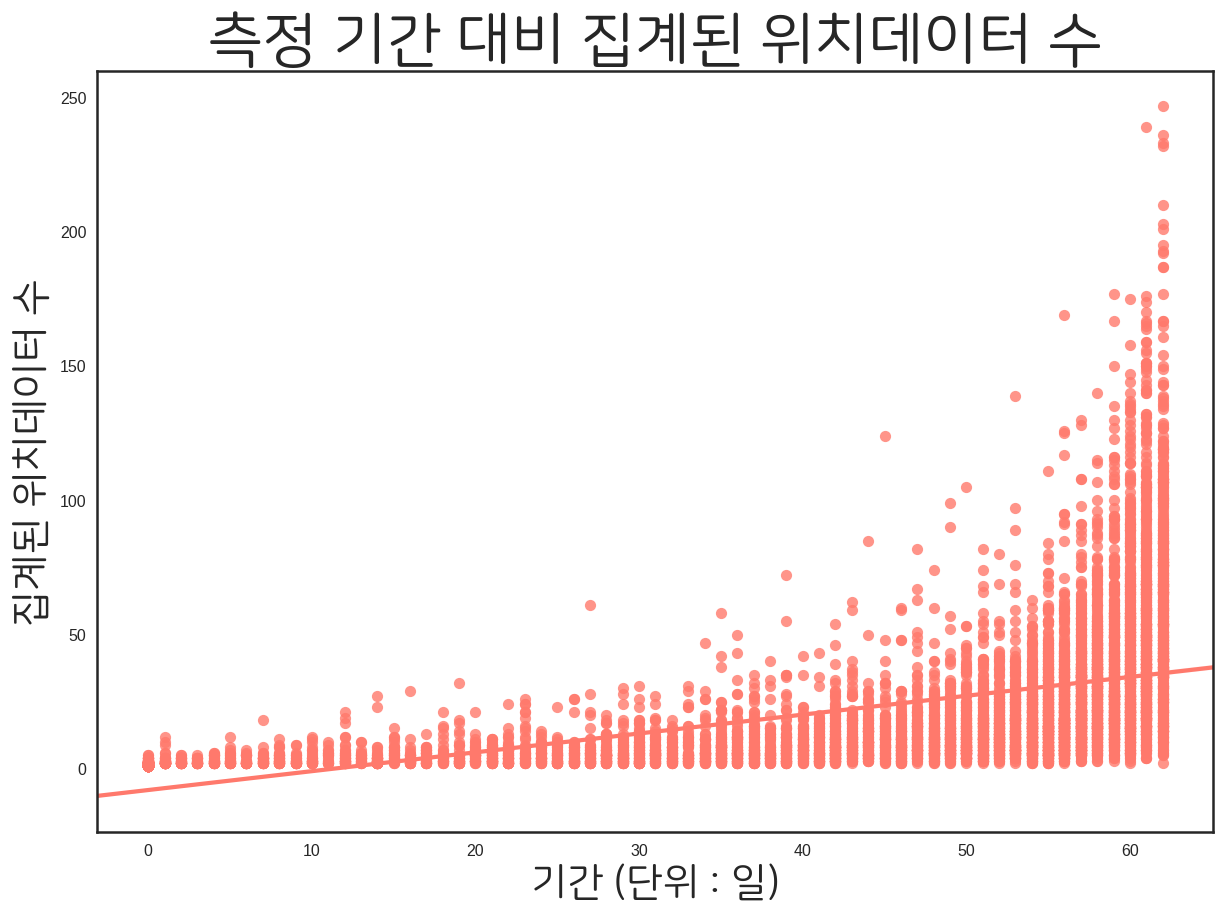

In [180]:
plt.figure(figsize=(10,7))

sns.regplot(x="diff", y="time", data=loc_mm_count, color='#ff796c' )

plt.xlabel('기간 (단위 : 일)', fontproperties=fontprop, fontsize=20)
plt.ylabel('집계된 위치데이터 수', fontproperties=fontprop, fontsize=20)
plt.title('측정 기간 대비 집계된 위치데이터 수', fontproperties=fontprop, fontsize=30)
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=10) 

plt.show()

In [137]:
# 타겟 패널 중 1076명은 위치데이터가 없음

len(target_user) - Location_target['pid'].nunique()

998

In [138]:
# placename의 더미화 : 타겟 패널의 5% 이상이 방문한 장소

target_freq_placename = Location_target.drop_duplicates(
    subset=['pid','placename'])['placename'].value_counts().reset_index()[lambda x: x.placename >= 500]

In [139]:
# 프랜차이즈 매장, 대중교통지역 등 패널들이 자주 방문하는 14곳 리스트

target_freq_placename.columns = ['placename', 'count_num']
target_freq_placename = target_freq_placename[lambda x: x.placename != '비식품'][lambda x: x.placename != '식품'].reset_index(drop=True)

In [140]:
target_freq_placename

,placename,count_num
0,GS25,2181
1,스타벅스,2175
2,파리바게뜨,1521
3,CU,1433
4,세븐일레븐,1190
5,이디야,1056
6,다이소,1021
7,롯데리아,1014
8,매표소/로비/휴게소,918
9,투썸플레이스,827


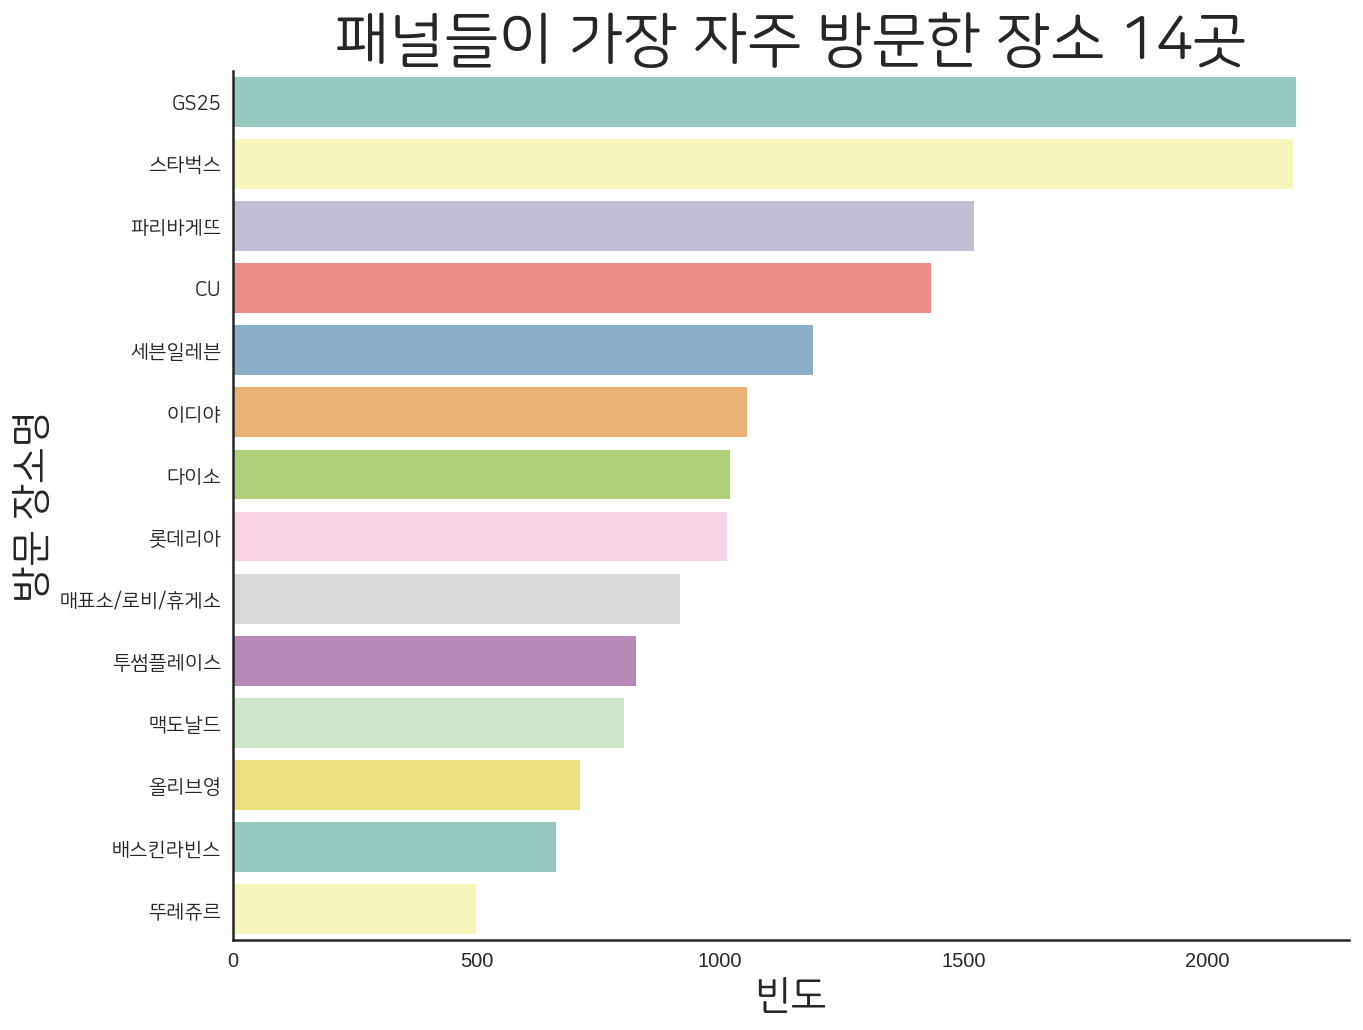

In [148]:

plt.figure(figsize=(10,8))
sns.barplot(x='count_num', y='placename', data=target_freq_placename, palette='Set3')
sns.despine()

plt.xlabel('빈도', fontproperties=fontprop, fontsize=20)
plt.ylabel('방문 장소명', fontproperties=fontprop, fontsize=20)
plt.title('패널들이 가장 자주 방문한 장소 14곳', fontproperties=fontprop, fontsize=30)
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=20) 
plt.yticks(fontproperties=fontprop)

plt.show()

In [149]:
# 1번 : 자주 방문하는 14곳 방문여부 더미화

freq_placename = Location_target.merge(target_freq_placename, how='left', on='placename')[lambda x: x.count_num.notnull()]
freq_placename_matrix = freq_placename.drop_duplicates(subset=['pid','placename'])[['pid','placename']].groupby(
    ['pid'])['placename'].value_counts().unstack().reset_index()

freq_placename_matrix = freq_placename_matrix.fillna(0)
del freq_placename_matrix.columns.name

In [150]:
freq_placename_matrix.head()

,pid,CU,GS25,다이소,뚜레쥬르,롯데리아,매표소/로비/휴게소,맥도날드,배스킨라빈스,세븐일레븐,스타벅스,올리브영,이디야,투썸플레이스,파리바게뜨
0,A0002542,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,A0003204,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,A0003696,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,A0003768,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,A0008228,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [152]:
# 2번 : 자주 방문하는 지점 카테고리별 방문 여부 (39개의 카테고리)

freq_category = pd.DataFrame(Location_target.groupby('pid')['category'].value_counts())
freq_category_matrix = freq_category.unstack()
freq_category_matrix = freq_category_matrix.fillna(0).reset_index()
freq_category_matrix.columns = freq_category_matrix.columns.droplevel(level=0)
del freq_category_matrix.columns.name
freq_category_matrix = freq_category_matrix.rename(columns = {'' : 'pid'}).set_index('pid')

def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

freq_category_matrix = freq_category_matrix.applymap(encode_units)

cat_sum = freq_category_matrix.sum().reset_index()
cat_sum.columns = ['cat_name','count_num']
cat_sum = cat_sum.sort_values(by='count_num', ascending=False)[lambda x: x.count_num >= 500].reset_index(drop=True)

freq_category_matrix = freq_category_matrix[list(cat_sum['cat_name'])]
freq_category_matrix = freq_category_matrix.reset_index()

In [160]:
loccat_freq = pd.DataFrame(freq_category_matrix.sum()[1:]).reset_index().rename(columns={'index':'category',0:'count'})

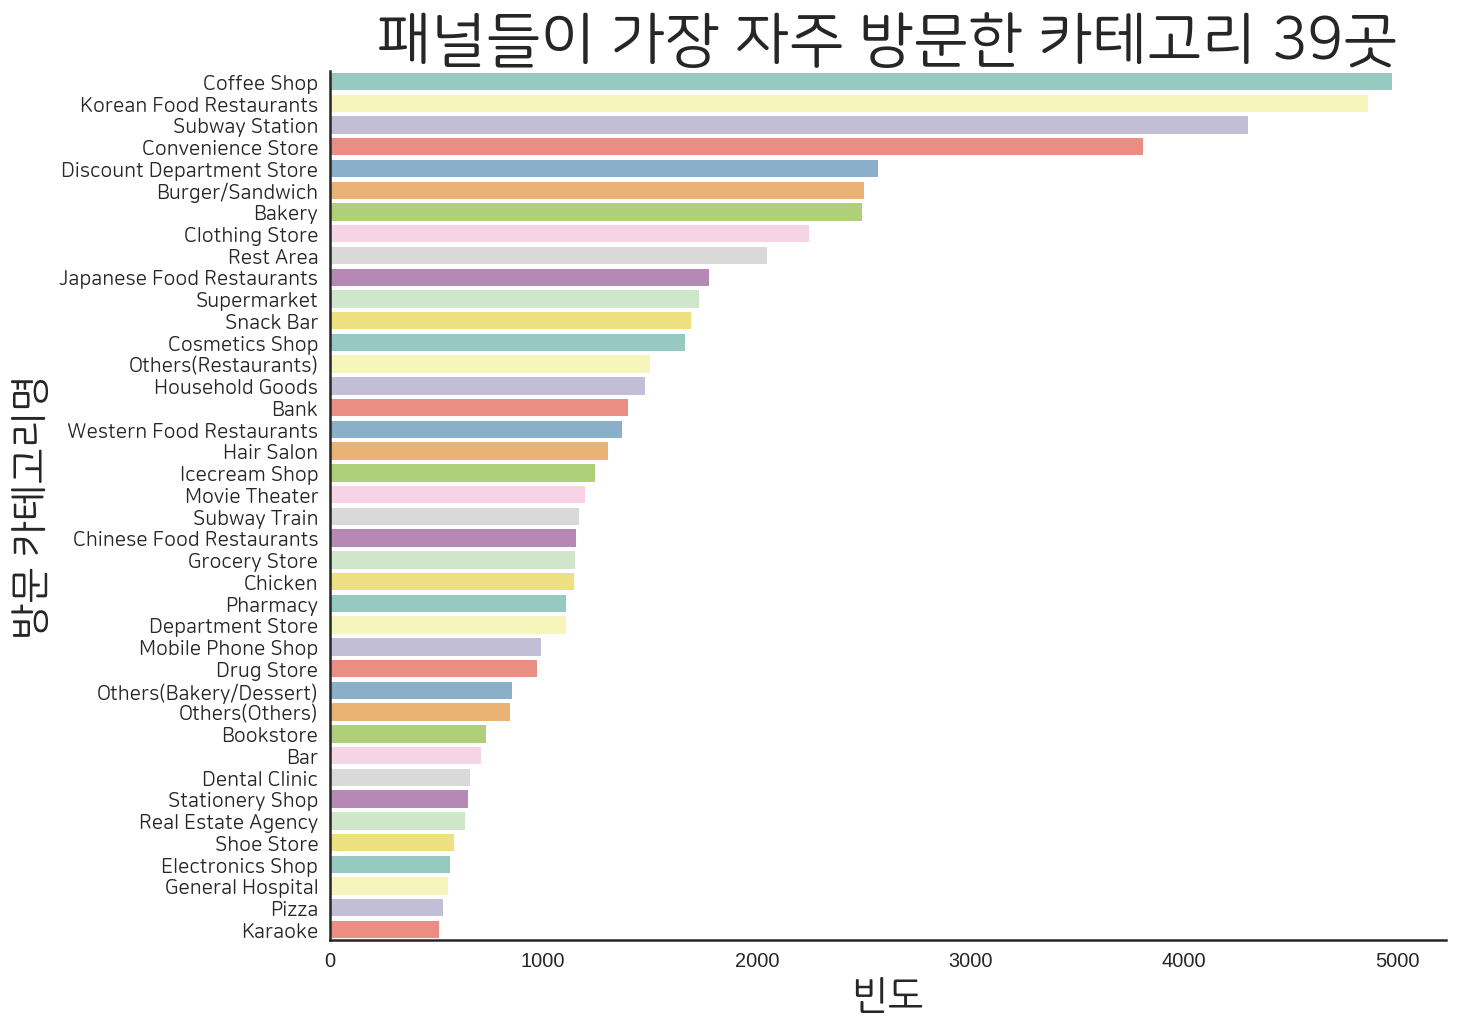

In [161]:
plt.figure(figsize=(10,8))
sns.barplot(x='count', y='category', data=loccat_freq, palette='Set3')
sns.despine()

plt.xlabel('빈도', fontproperties=fontprop, fontsize=20)
plt.ylabel('방문 카테고리명', fontproperties=fontprop, fontsize=20)
plt.title('패널들이 가장 자주 방문한 카테고리 39곳', fontproperties=fontprop, fontsize=30)
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=20) 
plt.yticks(fontproperties=fontprop)

plt.show()

In [24]:
freq_category_matrix.head()

,pid,Coffee Shop,Korean Food Restaurants,Subway Station,Convenience Store,Discount Department Store,Burger/Sandwich,Bakery,Clothing Store,Japanese Food Restaurants,Supermarket,Snack Bar,Cosmetics Shop,Others(Restaurants),Household Goods,Bank,Western Food Restaurants,Hair Salon,Icecream Shop,Movie Theater,Subway Train,Chinese Food Restaurants,Grocery Store,Chicken,Department Store,Pharmacy,Mobile Phone Shop,Drug Store,Others(Bakery/Dessert),Others(Others),Bookstore,Bar,Dental Clinic,Stationery Shop,Real Estate Agency,Shoe Store,Electronics Shop,General Hospital,Pizza,Karaoke
0,A0002542,0,0,1,1,1,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
1,A0003204,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,A0003696,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,A0003768,1,1,0,0,1,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,A0008228,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [25]:
# 3번 과정을 위한 지역 전처리

Location_target['address'] = Location_target['address'].fillna('불명')
Location_target['address'] = Location_target['address'].map(lambda x: '불명' if x == 'None' else x)

Location_target['address_split'] = Location_target['address'].map(lambda x: str(x).split(' '))
Location_target['address_split'] = Location_target['address_split'].map(lambda x: ['불명','불명'] if '불명' in x else x)

Location_target['address_city'] = Location_target['address_split'].map(lambda x: x[0])
Location_target['address_district'] = Location_target['address_split'].map(lambda x: x[1] if len(x)>1 else 'None')

Location_target['address_city'] = Location_target['address_city'].map(lambda x: 
                                        '서울' if x in ['서울','서울특별시','서울시'] 
                                        else '경기' if x in ['경기','경기도']
                                        else '인천' if x in ['인천','인천광역시','인천시']
                                        else '부산' if x in ['부산','부산광역시','부산시']
                                        else '대전' if x in ['대전','대전시','대전광역시']
                                        else '경남' if x in ['경남','경상남도']
                                        else '경북' if x in ['경북','경상북도']
                                        else '대구' if x in ['대구','대구광역시']
                                        else '광주' if x in ['광주','광주광역시']
                                        else '전북' if x in ['전북','전라북도']
                                        else '울산' if x in ['울산','울산광역시']
                                        else '전남' if x in ['전남','전라남도']
                                        else '강원' if x in ['강원','강원도']
                                        else '충북' if x in ['충북','충청북도']
                                        else '제주' if x in ['제주','제주특별자치도']
                                        else '세종' if x in ['세종','세종특별자치시']
                                        else '충남' if x in ['충남','충청남도']
                                        else x
                                                                    )

In [26]:
# 3번 : city 

freq_city = pd.DataFrame(Location_target[lambda x: x.address_city != '불명'].groupby('pid')['address_city'].value_counts())
freq_city.columns = ['count']
freq_city = freq_city.reset_index()

freq_city_list = pd.DataFrame(freq_city.groupby('pid')['address_city'].unique())
freq_city_list['Main_city'] = freq_city_list['address_city'].map(lambda x: x[0] if len(x) >= 1 else 'None' )
freq_city_list['City_count'] = freq_city_list['address_city'].map(lambda x: len(x))
del freq_city_list['address_city']
freq_city_list['City_count'] = freq_city_list['City_count'].map(lambda x: str(x))

freq_city_matrix = pd.get_dummies(freq_city_list)
freq_city_matrix['Main_city_경상'] = freq_city_matrix['Main_city_대구']+freq_city_matrix['Main_city_경남']+freq_city_matrix['Main_city_경북']+freq_city_matrix['Main_city_울산']+freq_city_matrix['Main_city_강원']
freq_city_matrix['Main_city_충청'] = freq_city_matrix['Main_city_대전']+freq_city_matrix['Main_city_충남']+freq_city_matrix['Main_city_충북']+freq_city_matrix['Main_city_세종']
freq_city_matrix['Main_city_전라'] = freq_city_matrix['Main_city_광주']+freq_city_matrix['Main_city_전남']+freq_city_matrix['Main_city_전북']+freq_city_matrix['Main_city_제주']
freq_city_matrix['City_count_more4'] = freq_city_matrix['City_count_4']+freq_city_matrix['City_count_5']+freq_city_matrix['City_count_6']+freq_city_matrix['City_count_7']

freq_city_matrix = freq_city_matrix[['Main_city_서울','Main_city_경기','Main_city_경상','Main_city_충청',
                 'Main_city_부산','Main_city_인천','Main_city_전라',
                  'City_count_1','City_count_2','City_count_3','City_count_more4']]

freq_city_matrix = freq_city_matrix.reset_index()

In [27]:
freq_city_matrix.head()

,pid,Main_city_서울,Main_city_경기,Main_city_경상,Main_city_충청,Main_city_부산,Main_city_인천,Main_city_전라,City_count_1,City_count_2,City_count_3,City_count_more4
0,A0002542,0,1,0,0,0,0,0,0,1,0,0
1,A0003204,0,0,0,0,0,1,0,0,0,1,0
2,A0003696,1,0,0,0,0,0,0,1,0,0,0
3,A0003768,0,1,0,0,0,0,0,1,0,0,0
4,A0008228,0,0,0,1,0,0,0,0,1,0,0


In [28]:
# 4번 : 수집 기간대비 위치데이터 수 (ratio, 값이 적을 경우 위치데이터 제공동의x거나 실제 외출x)

sample_Location_strptime = Location_target.groupby('pid')['time'].agg([min,max])
sample_Location_strptime['diff'] = sample_Location_strptime['max'] - sample_Location_strptime['min']
sample_Location_strptime['diff'] = sample_Location_strptime['diff'].map(lambda x: str(x).split(" ")[0])
sample_Location_strptime['min_day'] = sample_Location_strptime['min'].map(lambda x: str(x)[:10])
sample_Location_strptime['max_day'] = sample_Location_strptime['max'].map(lambda x: str(x)[:10])

sample_Location_strptime = sample_Location_strptime.reset_index()

sample_Location_length = sample_Location[lambda x: x.in_near == 'In']['pid'].value_counts().reset_index()
sample_Location_length.columns = ['pid', 'count']

sample_Location_len_strp = sample_Location_length.merge(sample_Location_strptime, how='inner', on='pid')
sample_Location_len_strp['diff'] = sample_Location_len_strp['diff'].map(lambda x: int(x))
sample_Location_len_strp['count_diff_ratio'] = (sample_Location_len_strp['count']/sample_Location_len_strp['diff']).round(1)

sample_Location_len_strp['count_diff_ratio_bin'] = sample_Location_len_strp['count_diff_ratio'].map(lambda x: '0.25' if x<= 0.25 
                                                else '0.5' if 0.25<x<=0.5
                                                else '0.75' if 0.5<x<=0.75                                                 
                                                else '1' if 0.75<x<=1 
                                                else '2' if 1<x<=2
                                                else '3' if 2<x<=3
                                                else '3to5' if 3<x<=5
                                                else '5to11' if 5<x<=11
                                                else 'more11'
                                                )

sample_Location_len_strp = sample_Location_len_strp[['pid','count_diff_ratio_bin']]
sample_Location_len_strp.columns = ['pid', 'ratio']
ratio_matrix = pd.get_dummies(sample_Location_len_strp,columns=['ratio'])

ratio_matrix.head()

,pid,ratio_0.25,ratio_0.5,ratio_0.75,ratio_1,ratio_2,ratio_3,ratio_3to5,ratio_5to11,ratio_more11
0,P0203409,0,0,0,0,0,0,0,0,1
1,P0190591,0,0,0,0,0,0,0,0,1
2,P0112561,0,0,0,0,0,0,0,0,1
3,M0168585,0,0,0,0,0,0,0,0,1
4,H0007228,0,0,0,0,0,0,0,0,1


In [29]:
target_user.columns = ['pid', 'reg_cnt']

In [30]:
AR_target_location = target_user.merge(freq_placename_matrix, how='left', on='pid')
AR_target_location = AR_target_location.merge(freq_category_matrix, how='left', on='pid')
AR_target_location = AR_target_location.merge(freq_city_matrix, how='left', on='pid')
AR_target_location = AR_target_location.merge(ratio_matrix, how='left', on='pid')

del AR_target_location['reg_cnt']
AR_target_location = AR_target_location.fillna(0)

In [31]:
AR_target_location.head()

,pid,CU,GS25,다이소,뚜레쥬르,롯데리아,매표소/로비/휴게소,맥도날드,배스킨라빈스,세븐일레븐,스타벅스,올리브영,이디야,투썸플레이스,파리바게뜨,Coffee Shop,Korean Food Restaurants,Subway Station,Convenience Store,Discount Department Store,Burger/Sandwich,Bakery,Clothing Store,Japanese Food Restaurants,Supermarket,Snack Bar,Cosmetics Shop,Others(Restaurants),Household Goods,Bank,Western Food Restaurants,Hair Salon,Icecream Shop,Movie Theater,Subway Train,Chinese Food Restaurants,Grocery Store,Chicken,Department Store,Pharmacy,Mobile Phone Shop,Drug Store,Others(Bakery/Dessert),Others(Others),Bookstore,Bar,Dental Clinic,Stationery Shop,Real Estate Agency,Shoe Store,Electronics Shop,General Hospital,Pizza,Karaoke,Main_city_서울,Main_city_경기,Main_city_경상,Main_city_충청,Main_city_부산,Main_city_인천,Main_city_전라,City_count_1,City_count_2,City_count_3,City_count_more4,ratio_0.25,ratio_0.5,ratio_0.75,ratio_1,ratio_2,ratio_3,ratio_3to5,ratio_5to11,ratio_more11
0,A0002542,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,A0003204,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,A0003696,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,A0003768,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,A0008228,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [32]:
AR_target_location.shape

(9681, 74)

In [33]:
AR_target_location.to_csv("AR_target_location.csv", index=False)

In [34]:
# 9600여명이 패널 중 해당 변수에 속한 경우를 각각 count
# 예를 들면 전체 패널 중 1433명이 10주 이내 CU를 1회라도 방문

AR_target_location.sum()[1:]

CU                           1433
GS25                         2181
다이소                          1021
뚜레쥬르                          500
롯데리아                         1014
매표소/로비/휴게소                    918
맥도날드                          803
배스킨라빈스                        663
세븐일레븐                        1190
스타벅스                         2175
올리브영                          713
이디야                          1056
투썸플레이스                        827
파리바게뜨                        1521
Coffee Shop                  4972
Korean Food Restaurants      4858
Subway Station               4297
Convenience Store            3810
Discount Department Store    2566
Burger/Sandwich              2501
Bakery                       2494
Clothing Store               2244
Japanese Food Restaurants    1774
Supermarket                  1727
Snack Bar                    1692
Cosmetics Shop               1666
Others(Restaurants)          1499
Household Goods              1478
Bank                         1398
Western Food R

<br>
<br>
<br>
<br>
<br>
# usage_sum_time_notzero

## AR분석을 위한 앱데이터

### 분석에 사용되는 앱 사용여부 이외의 앱 사용패턴 입력

---

In [8]:
usage_sum_time_notzero.head()

,panel_id,reg_cnt,package_name,app_name,app_category,total_time_stamp,total_time,reg_date,total_time_hour,total_time_minute,total_time_second,total_usage_time
14,A0000910,10,com.facebook.katana,Facebook,소셜,105439.0,00:01:45,2017-11-25,0,1,45,1.8
16,A0000910,10,com.facebook.orca,Messenger,커뮤니케이션,124418.0,00:02:04,2017-11-25,0,2,4,2.1
31,A0000910,10,com.hrc.mobilo,MobileCX,라이프스타일,64098.0,00:01:04,2017-11-25,0,1,4,1.1
36,A0000910,10,com.interpark.notitome,NotiToMe,라이프스타일,307031.0,00:05:07,2017-11-25,0,5,7,5.1
39,A0000910,10,com.kakao.page,카카오페이지,도서/참고자료,3581975.0,00:59:41,2017-11-25,0,59,41,59.7


In [9]:
usage_sum_time_notzero['app_category'] = usage_sum_time_notzero['app_category'].fillna('N')
usage_sum_time_notzero['app_category'].map(lambda x: 1 if x == 'N' else 0).value_counts()

0    12835464
1     1037208
Name: app_category, dtype: int64

In [10]:
usage_sum_time_notzero['null_category?'] = usage_sum_time_notzero['app_category'].map(lambda x: 1 if x == 'N' else 0)

# 카테고리가 명시되지 않은 앱 목록
# 카테고리가 분명히 있는데 그냥 표시가 안된 친구들이 많다
# 카테고리 있는 친구들로 맵핑시켜줌

notzero_null_cat = usage_sum_time_notzero[lambda x: x['null_category?'] == 1]
notzero_null_cat = notzero_null_cat.reset_index()
notzero_with_cat = usage_sum_time_notzero[lambda x: x['null_category?'] == 0][['app_name','app_category']].drop_duplicates()
notzero_notnull_cat = usage_sum_time_notzero[lambda x: x['null_category?'] == 0]

notzero_null_cat = notzero_null_cat.merge(notzero_with_cat, how='left', on='app_name').drop_duplicates(subset='index')
del notzero_null_cat['app_category_x']
notzero_null_cat.columns = ['index', 'panel_id', 'reg_cnt', 'package_name', 'app_name',
       'total_time_stamp', 'total_time', 'reg_date', 'total_time_hour',
       'total_time_minute', 'total_time_second', 'total_usage_time',
       'null_category?', 'app_category']

usage_sum_time_notzero_cat_apply = pd.concat([notzero_null_cat,notzero_notnull_cat])
del usage_sum_time_notzero_cat_apply['index']
del usage_sum_time_notzero_cat_apply['null_category?']

In [11]:
usage_sum_time_notzero_cat_apply.head()

,app_category,app_name,package_name,panel_id,reg_cnt,reg_date,total_time,total_time_hour,total_time_minute,total_time_second,total_time_stamp,total_usage_time
0,커뮤니케이션,Chrome,com.android.chrome,A0000910,12,2017-12-04,00:00:07,0,0,7,7191.0,0.1
1,라이프스타일,두잇서베이,com.DooitLocalResearch2,A0000910,12,2017-12-04,00:05:33,0,5,33,333920.0,5.6
2,라이프스타일,패널파워,com.embrain.panelpower,A0000910,12,2017-12-04,00:00:42,0,0,42,42435.0,0.7
3,소셜,Facebook,com.facebook.katana,A0000910,12,2017-12-04,00:01:27,0,1,27,87628.0,1.4
4,동영상 플레이어/편집기,YouTube,com.google.android.youtube,A0000910,12,2017-12-04,03:01:18,3,1,18,10878893.0,181.3


In [12]:
# 카테고리 결측치 103만개 -> 18만개로 확 줄임. 굿.

usage_sum_time_notzero_cat_apply.isnull().sum()

app_category         189150
app_name                  0
package_name              0
panel_id                  0
reg_cnt                   0
reg_date                  0
total_time                0
total_time_hour           0
total_time_minute         0
total_time_second         0
total_time_stamp          0
total_usage_time          0
dtype: int64

In [13]:
usage_sum_time_notzero_cat_apply = usage_sum_time_notzero_cat_apply.fillna('N')

In [14]:
# 분석 대상이 되는 패널만 선별

target_notzero = usage_sum_time_notzero_cat_apply[lambda x: 32< x.reg_cnt]

target_panel = target_notzero.groupby('panel_id')['reg_cnt'].nunique().reset_index()
target_panel.columns = ['panel_id', 'reg_cnt_counted']
target_panel = target_panel[lambda x: x.reg_cnt_counted == 10].reset_index(drop=True)

target_notzero = target_notzero.merge(target_panel, how='left', on='panel_id')
target_notzero = target_notzero[lambda x: x.reg_cnt_counted.notnull()]

<br>
<br>
<br>

## 1. 10주간 한번이라도 사용한 앱의 수
<br><br>

In [55]:

# 1. 10주간 한번이라도 사용한 앱의 수

target_app_count = target_notzero.groupby('panel_id')['app_name'].nunique().reset_index()
target_app_count.columns = ['panel_id', 'app_counted']
target_app_count['app_counted'] = target_app_count['app_counted'].map(lambda x: x//10*10)
target_app_count.columns = ['panel_id', 'app_counted']

In [56]:
target_app_count.head()

,panel_id,app_counted
0,A0002542,50
1,A0003204,50
2,A0003696,110
3,A0003768,70
4,A0008228,90


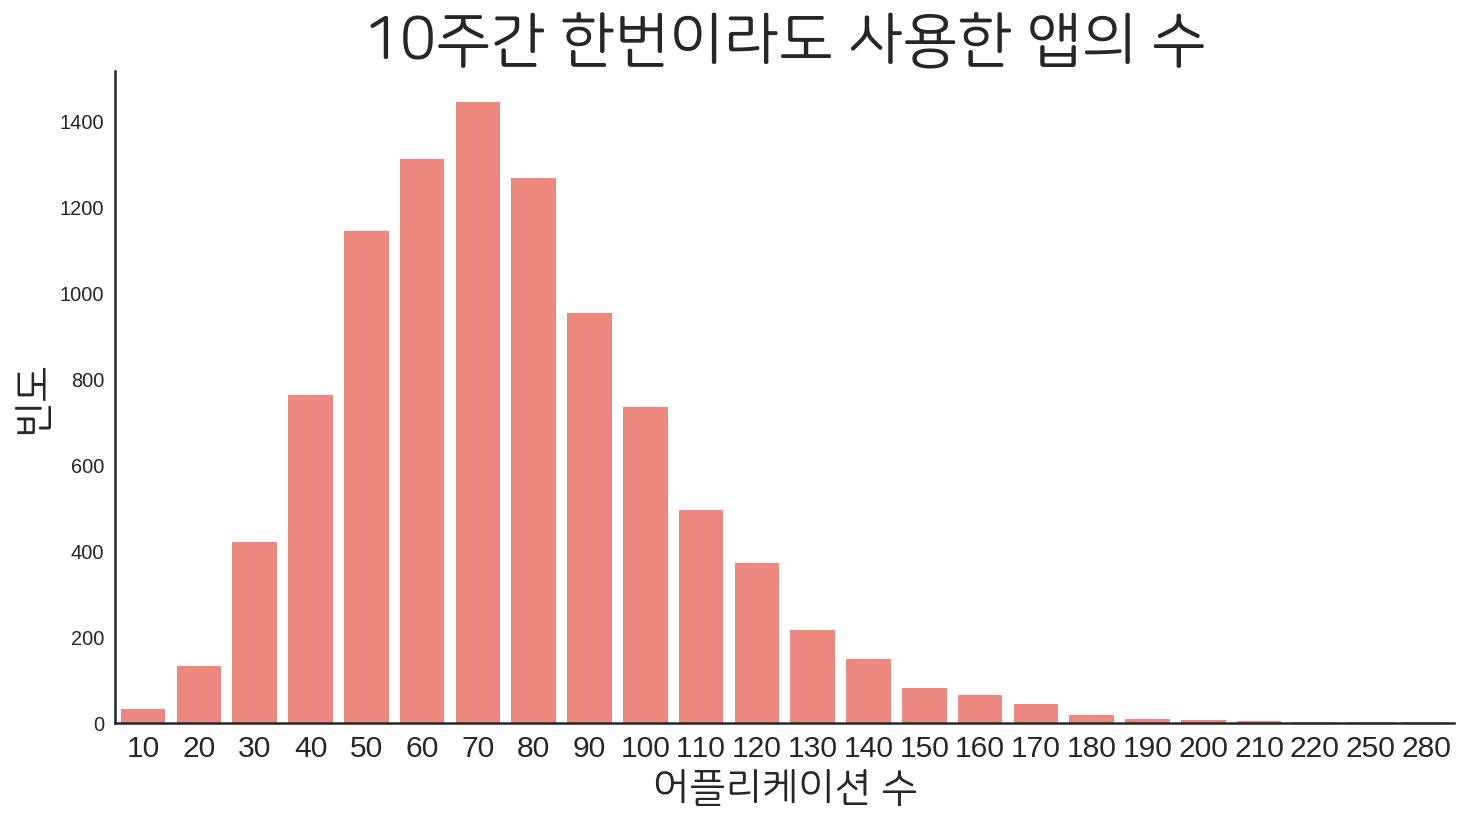

In [57]:

appcount_freq = target_app_count.groupby('app_counted').count()

plt.figure(figsize=(12,6))
sns.barplot(x=appcount_freq.panel_id.index, y=appcount_freq.panel_id.values,  color='#ff796c')
sns.despine()


plt.xlabel('어플리케이션 수', fontproperties=fontprop, fontsize=20)
plt.ylabel('빈도', fontproperties=fontprop, fontsize=20)
plt.title('10주간 한번이라도 사용한 앱의 수', fontproperties=fontprop, fontsize=30)
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 

plt.show()

In [58]:
target_app_count['app_counted_bin'] = target_app_count['app_counted'].map(lambda x: 'less30' if x <= 30
                                        else 'more120' if x >= 120
                                   else x)

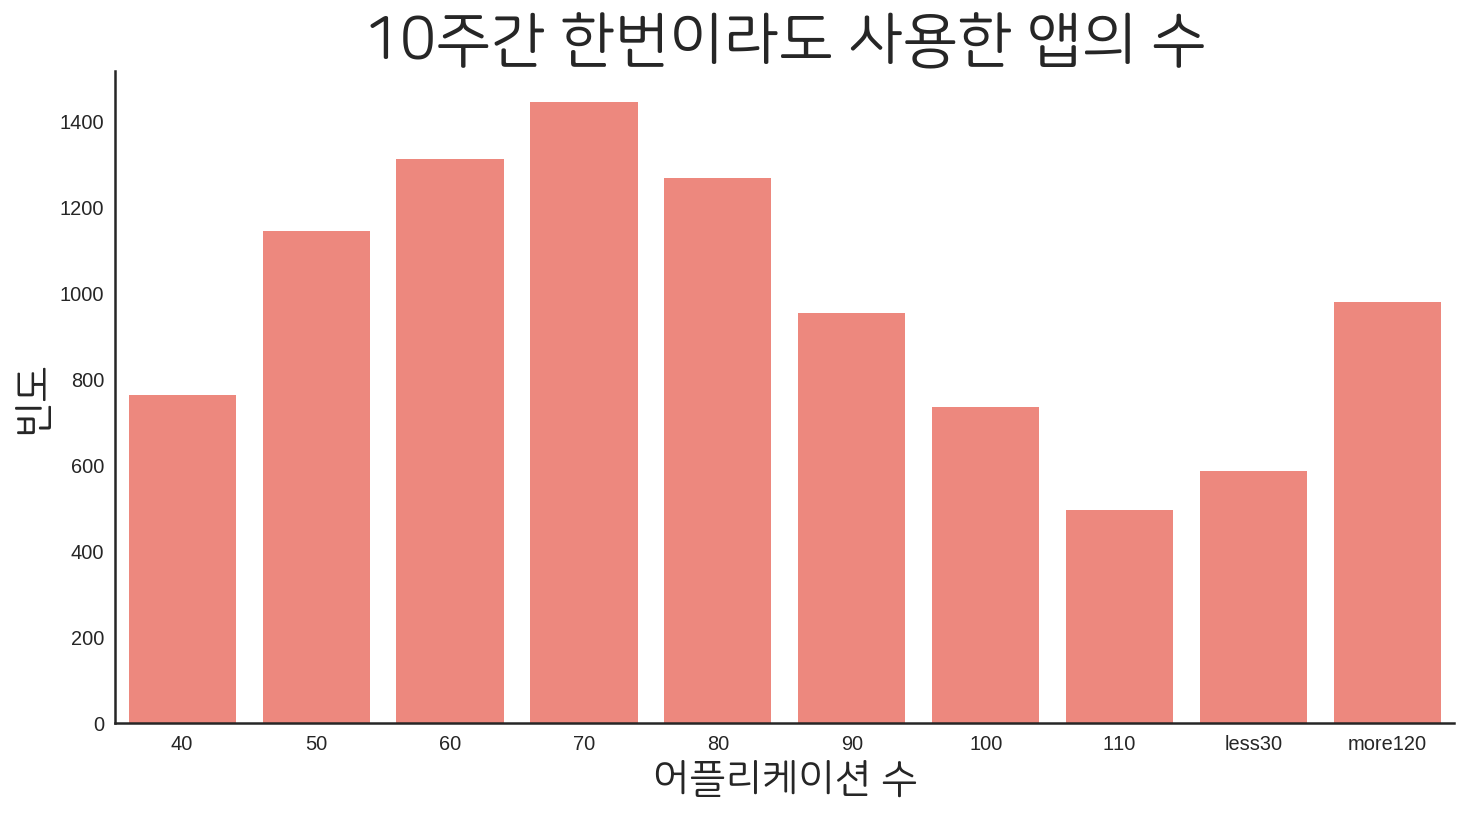

In [59]:
# 적절히 Binning완료

appcount_freq = target_app_count.groupby('app_counted_bin').count()

plt.figure(figsize=(12,6))
sns.barplot(x=appcount_freq.panel_id.index, y=appcount_freq.panel_id.values,  color='#ff796c')
sns.despine()

plt.xlabel('어플리케이션 수', fontproperties=fontprop, fontsize=20)
plt.ylabel('빈도', fontproperties=fontprop, fontsize=20)
plt.title('10주간 한번이라도 사용한 앱의 수', fontproperties=fontprop, fontsize=30)
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 

plt.show()

In [60]:
# 더미화

target_app_count = pd.get_dummies(data = target_app_count, columns = ['app_counted_bin'], prefix='App_num_total')
del target_app_count['app_counted']
target_app_count.head()

,panel_id,App_num_total_40,App_num_total_50,App_num_total_60,App_num_total_70,App_num_total_80,App_num_total_90,App_num_total_100,App_num_total_110,App_num_total_less30,App_num_total_more120
0,A0002542,0,1,0,0,0,0,0,0,0,0
1,A0003204,0,1,0,0,0,0,0,0,0,0
2,A0003696,0,0,0,0,0,0,0,1,0,0
3,A0003768,0,0,0,1,0,0,0,0,0,0
4,A0008228,0,0,0,0,0,1,0,0,0,0


<br>
<br>
<br>

## 2. 매주 평균적으로 사용한 앱 수
<br><br>

In [61]:

# 2. 매주 평균적으로 사용한 앱 수

target_app_mean = target_notzero.groupby(['panel_id','reg_cnt'])['app_name'].nunique().reset_index()
target_app_mean.columns = ['panel_id','reg_cnt','app_count_mean']
target_app_mean = target_app_mean.groupby('panel_id')['app_count_mean'].mean().reset_index()
target_app_mean['app_count_mean'] = target_app_mean['app_count_mean'].map(lambda x: x//10*10)

In [62]:
target_app_mean.head()

,panel_id,app_count_mean
0,A0002542,30.0
1,A0003204,30.0
2,A0003696,70.0
3,A0003768,20.0
4,A0008228,50.0


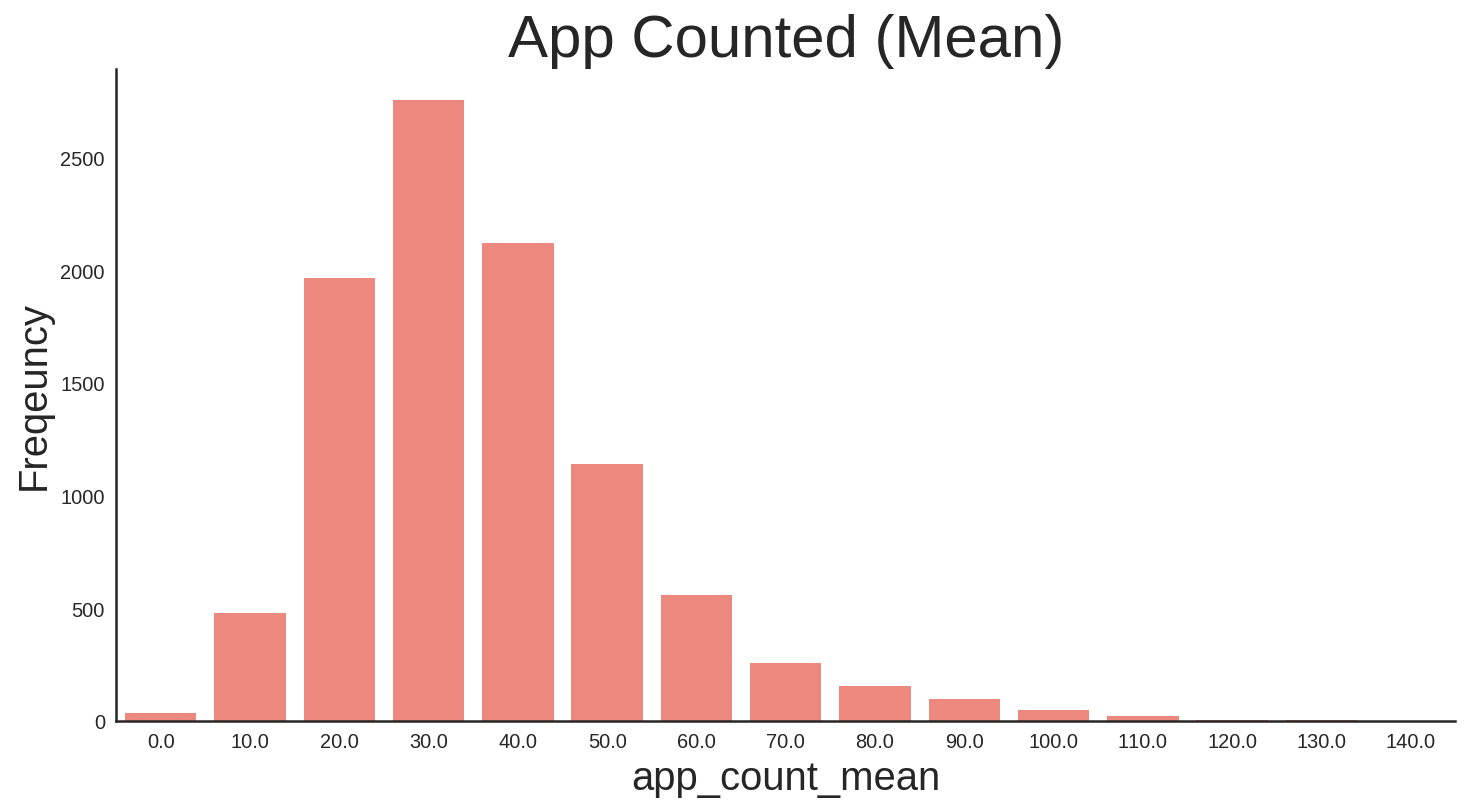

In [63]:
appcountmean_freq = target_app_mean.groupby('app_count_mean').count()

plt.figure(figsize=(12,6))
plt.xlabel('App Counted (Mean)', fontsize=20)
plt.ylabel('Freqeuncy', fontsize=20)
plt.title('App Counted (Mean)', fontsize=30)
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 

sns.barplot(x=appcountmean_freq.panel_id.index, y=appcountmean_freq.panel_id.values,  color='#ff796c')
sns.despine()

plt.show()

In [64]:
target_app_mean['app_count_mean_bin'] = target_app_mean['app_count_mean'].map(lambda x: 'less10' if x <= 10
                                        else 'more70' if x >= 70
                                   else x)

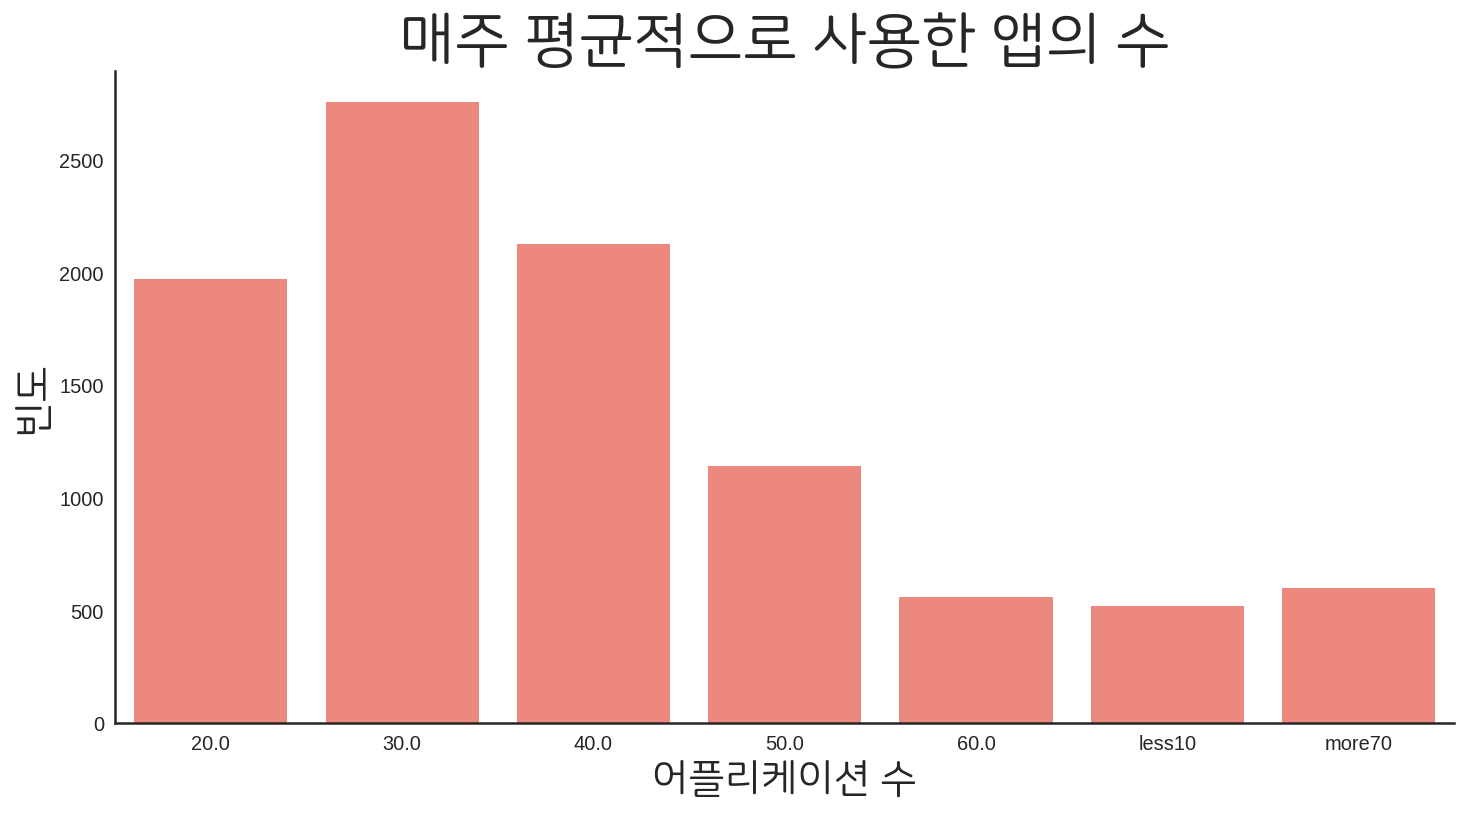

In [65]:
appcountmean_freq = target_app_mean.groupby('app_count_mean_bin').count()

plt.figure(figsize=(12,6))
sns.barplot(x=appcountmean_freq.panel_id.index, y=appcountmean_freq.panel_id.values,  color='#ff796c')
sns.despine()

plt.xlabel('어플리케이션 수', fontproperties=fontprop, fontsize=20)
plt.ylabel('빈도', fontproperties=fontprop, fontsize=20)
plt.title('매주 평균적으로 사용한 앱의 수', fontproperties=fontprop, fontsize=30)
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 

plt.show()

In [66]:
# 더미화

target_app_mean = pd.get_dummies(data = target_app_mean, columns = ['app_count_mean_bin'], prefix='App_num_mean')
del target_app_mean['app_count_mean']
target_app_mean.head()

,panel_id,App_num_mean_20.0,App_num_mean_30.0,App_num_mean_40.0,App_num_mean_50.0,App_num_mean_60.0,App_num_mean_less10,App_num_mean_more70
0,A0002542,0,1,0,0,0,0,0
1,A0003204,0,1,0,0,0,0,0
2,A0003696,0,0,0,0,0,0,1
3,A0003768,1,0,0,0,0,0,0
4,A0008228,0,0,0,1,0,0,0


<br>
<br>
<br>

## 3. 평균 사용 앱 수와 전체 사용 앱 수의 갭

차이가 많이 날수록 개별 앱에 대한 충성도가 낮은 패널으로 볼 수 있다.
<br><br>

In [67]:
target_app_count = target_notzero.groupby('panel_id')['app_name'].nunique().reset_index()
target_app_count.columns = ['panel_id', 'app_counted']
target_app_count.head()

,panel_id,app_counted
0,A0002542,52
1,A0003204,59
2,A0003696,113
3,A0003768,74
4,A0008228,98


In [68]:
target_app_mean = target_notzero.groupby(['panel_id','reg_cnt'])['app_name'].nunique().reset_index()
target_app_mean.columns = ['panel_id','reg_cnt','app_count_mean']
target_app_mean = target_app_mean.groupby('panel_id')['app_count_mean'].mean().reset_index()
target_app_mean.head()

,panel_id,app_count_mean
0,A0002542,36.9
1,A0003204,30.2
2,A0003696,70.5
3,A0003768,28.5
4,A0008228,53.9


In [69]:
target_app_count_gap = target_app_count.merge(target_app_mean, how='left', on='panel_id')
target_app_count_gap['app_counted_gap'] = target_app_count_gap['app_counted'] - target_app_count_gap['app_count_mean']
target_app_count_gap.head()

,panel_id,app_counted,app_count_mean,app_counted_gap
0,A0002542,52,36.9,15.1
1,A0003204,59,30.2,28.8
2,A0003696,113,70.5,42.5
3,A0003768,74,28.5,45.5
4,A0008228,98,53.9,44.1


In [70]:
target_app_count_gap = target_app_count.merge(target_app_mean, how='left', on='panel_id')
target_app_count_gap['app_counted_gap'] = target_app_count_gap['app_counted'] - target_app_count_gap['app_count_mean']
target_app_count_gap['app_counted_gap'] = target_app_count_gap['app_counted_gap'].map(lambda x: x//10*10)
target_app_count_gap.head()

,panel_id,app_counted,app_count_mean,app_counted_gap
0,A0002542,52,36.9,10.0
1,A0003204,59,30.2,20.0
2,A0003696,113,70.5,40.0
3,A0003768,74,28.5,40.0
4,A0008228,98,53.9,40.0


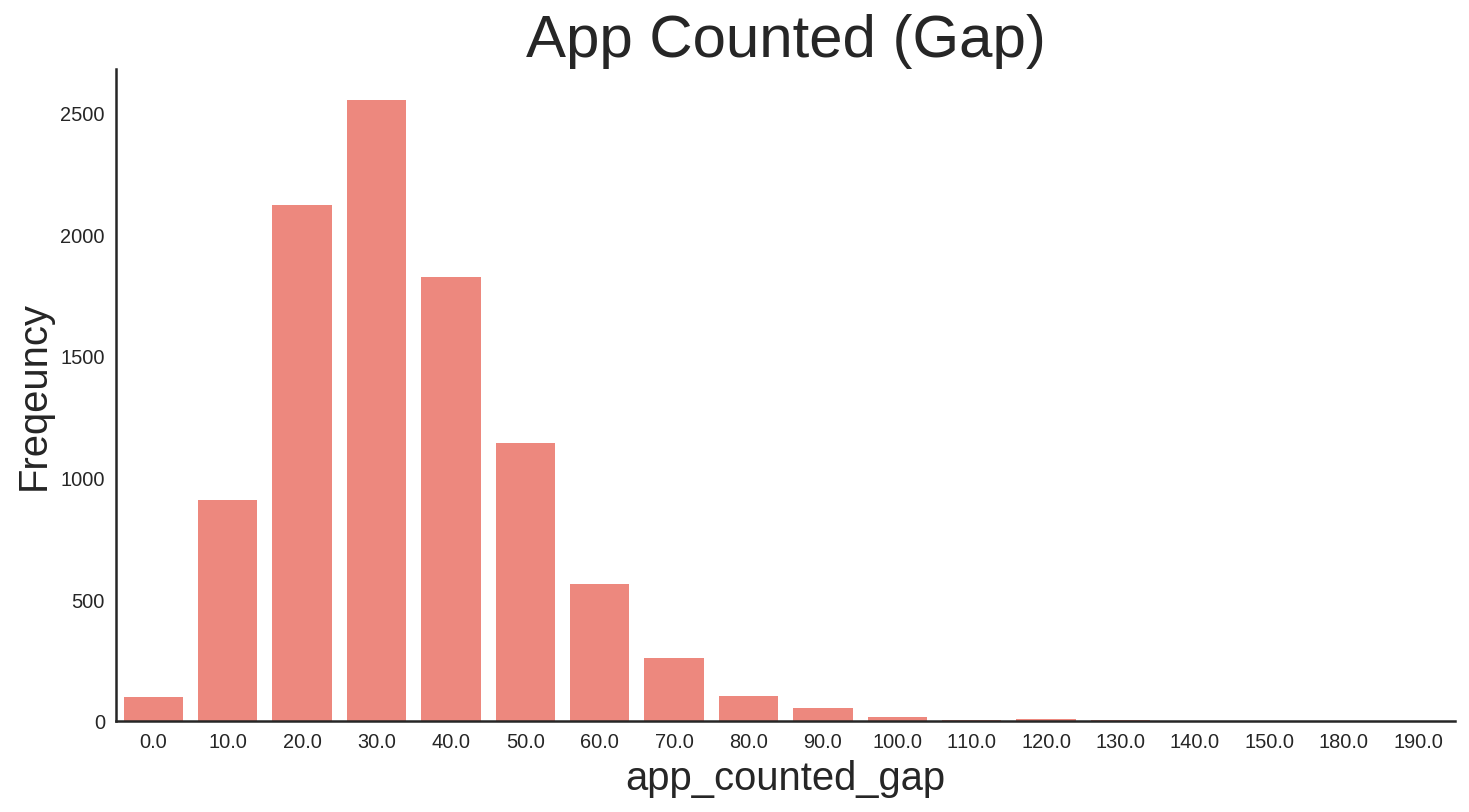

In [71]:
appcountgap_freq = target_app_count_gap.groupby('app_counted_gap').count()

plt.figure(figsize=(12,6))
plt.xlabel('App Counted (Gap)', fontsize=20)
plt.ylabel('Freqeuncy', fontsize=20)
plt.title('App Counted (Gap)', fontsize=30)
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 

sns.barplot(x=appcountgap_freq.panel_id.index, y=appcountgap_freq.panel_id.values,  color='#ff796c')
sns.despine()

plt.show()

In [72]:
target_app_count_gap['app_counted_gap_bin'] = target_app_count_gap['app_counted_gap'].map(lambda x: 'less10' if x <= 10
                                        else 'more70' if x >= 70
                                   else x)

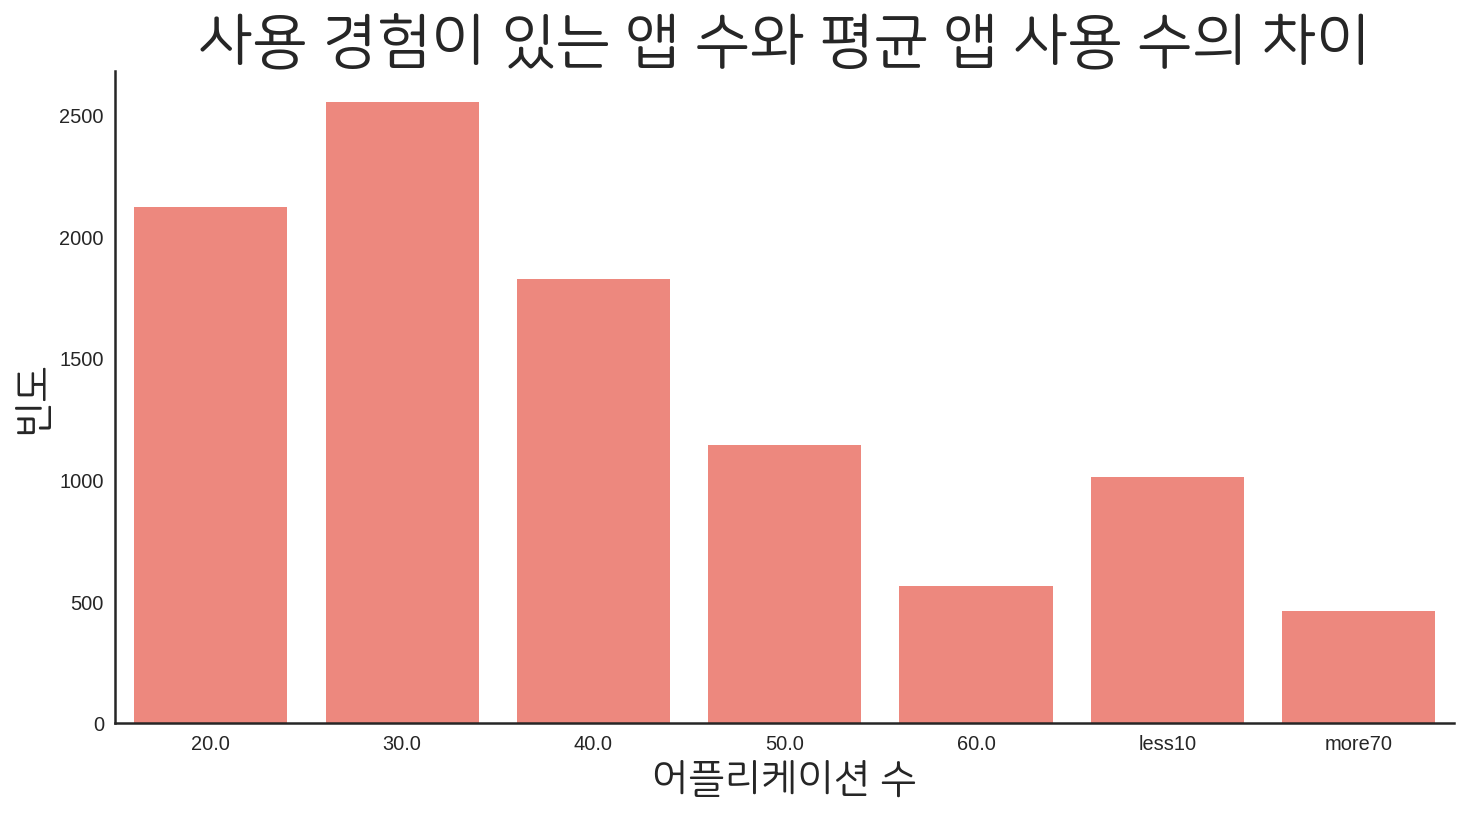

In [73]:
appcountgap_freq = target_app_count_gap.groupby('app_counted_gap_bin').count()

plt.figure(figsize=(12,6))
sns.barplot(x=appcountgap_freq.panel_id.index, y=appcountgap_freq.panel_id.values,  color='#ff796c')
sns.despine()

plt.xlabel('어플리케이션 수', fontproperties=fontprop, fontsize=20)
plt.ylabel('빈도', fontproperties=fontprop, fontsize=20)
plt.title('사용 경험이 있는 앱 수와 평균 앱 사용 수의 차이', fontproperties=fontprop, fontsize=30)
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 

plt.show()

In [74]:
target_app_count_gap.head()

,panel_id,app_counted,app_count_mean,app_counted_gap,app_counted_gap_bin
0,A0002542,52,36.9,10.0,less10
1,A0003204,59,30.2,20.0,20
2,A0003696,113,70.5,40.0,40
3,A0003768,74,28.5,40.0,40
4,A0008228,98,53.9,40.0,40


In [75]:
target_app_count_gap = pd.get_dummies(data = target_app_count_gap, columns = ['app_counted_gap_bin'], prefix='App_num_gap')
del target_app_count_gap['app_counted']
del target_app_count_gap['app_count_mean']
del target_app_count_gap['app_counted_gap']
target_app_count_gap.head()

,panel_id,App_num_gap_20.0,App_num_gap_30.0,App_num_gap_40.0,App_num_gap_50.0,App_num_gap_60.0,App_num_gap_less10,App_num_gap_more70
0,A0002542,0,0,0,0,0,1,0
1,A0003204,1,0,0,0,0,0,0
2,A0003696,0,0,1,0,0,0,0
3,A0003768,0,0,1,0,0,0,0
4,A0008228,0,0,1,0,0,0,0


<br>
<br>
<br>

## 4. 주간 총 사용시간 (평균)

매주 사용하는 모든 앱 사용시간의 평균 -> 이 값들의 10주간 평균값
<br><br>

In [76]:
target_usage_time_mean = (
    target_notzero.groupby(['panel_id','reg_cnt'])['total_usage_time'].mean().reset_index()
    .groupby('panel_id')['total_usage_time'].mean().reset_index()
)

In [77]:
target_app_count_gap.head()
target_usage_time_mean.head()

,panel_id,total_usage_time
0,A0002542,77.487152
1,A0003204,157.791687
2,A0003696,85.990252
3,A0003768,51.288383
4,A0008228,243.321904


In [78]:
target_usage_time_mean['total_usage_time'] = target_usage_time_mean['total_usage_time'].map(lambda x: x//10*10)

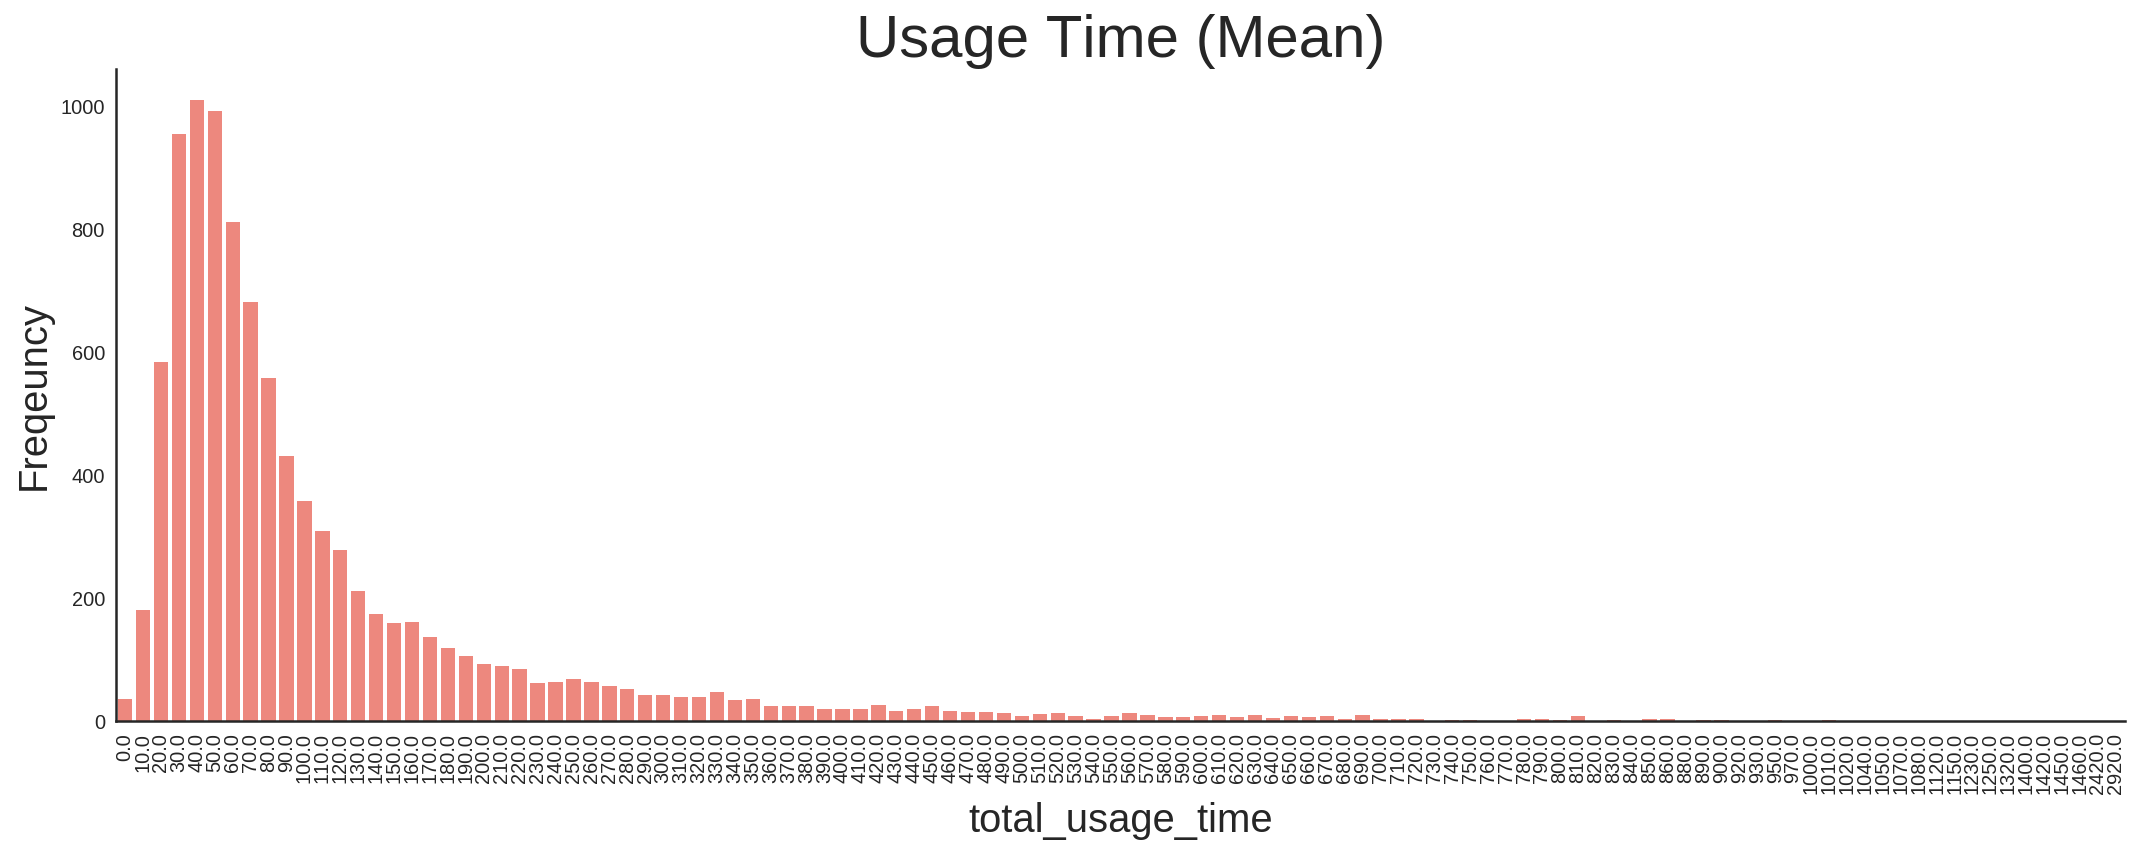

In [79]:
time_mean_freq = target_usage_time_mean.groupby('total_usage_time').count()

plt.figure(figsize=(18,6))
plt.xlabel('Usage Time (Mean)', fontsize=20)
plt.ylabel('Freqeuncy', fontsize=20)
plt.title('Usage Time (Mean)', fontsize=30)
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 
plt.xticks(rotation=90)

sns.barplot(x=time_mean_freq.panel_id.index, y=time_mean_freq.panel_id.values,  color='#ff796c')
sns.despine()

plt.show()

In [80]:
target_usage_time_mean['total_usage_time_bin'] = target_usage_time_mean['total_usage_time'].map(lambda x: 'less20' if x <= 20
                                        else '100to200' if 100<=x<200
                                        else 'more200' if x >= 200                                                           
                                   else x)

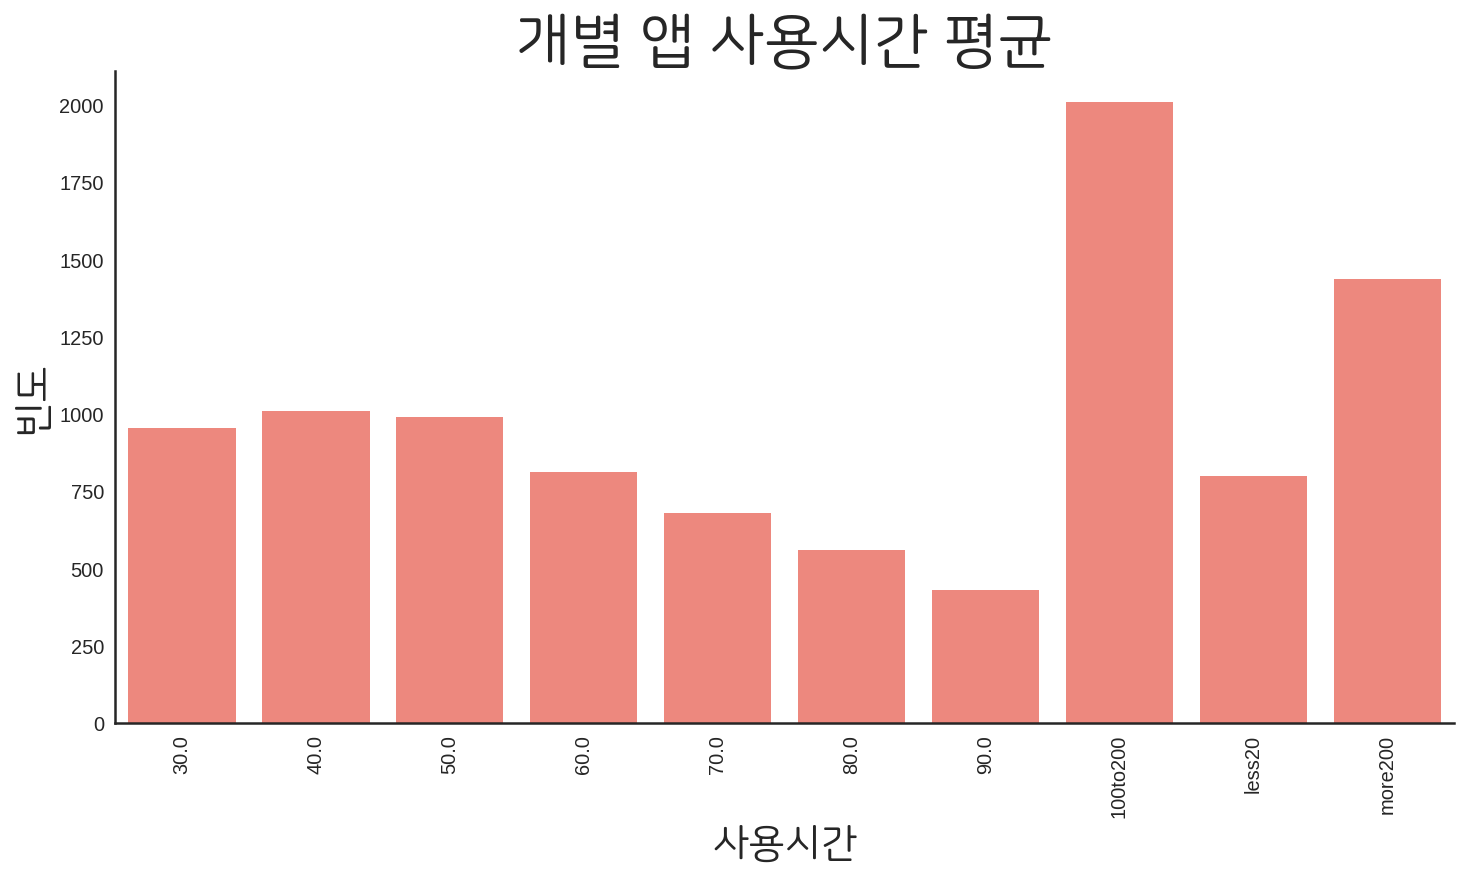

In [81]:
time_mean_freq = target_usage_time_mean.groupby('total_usage_time_bin').count()

plt.figure(figsize=(12,6))
sns.barplot(x=time_mean_freq.panel_id.index, y=time_mean_freq.panel_id.values,  color='#ff796c')
sns.despine()


plt.xlabel('사용시간', fontproperties=fontprop, fontsize=20)
plt.ylabel('빈도', fontproperties=fontprop, fontsize=20)
plt.title('개별 앱 사용시간 평균', fontproperties=fontprop, fontsize=30)
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 
plt.xticks(rotation=90)

plt.show()

In [82]:
target_usage_time_mean = pd.get_dummies(data = target_usage_time_mean, columns = ['total_usage_time_bin'], prefix='Usage_time_mean')
del target_usage_time_mean['total_usage_time']
target_usage_time_mean.head()

,panel_id,Usage_time_mean_30.0,Usage_time_mean_40.0,Usage_time_mean_50.0,Usage_time_mean_60.0,Usage_time_mean_70.0,Usage_time_mean_80.0,Usage_time_mean_90.0,Usage_time_mean_100to200,Usage_time_mean_less20,Usage_time_mean_more200
0,A0002542,0,0,0,0,1,0,0,0,0,0
1,A0003204,0,0,0,0,0,0,0,1,0,0
2,A0003696,0,0,0,0,0,1,0,0,0,0
3,A0003768,0,0,1,0,0,0,0,0,0,0
4,A0008228,0,0,0,0,0,0,0,0,0,1


<br>
<br>
<br>

## 5. 주로 사용한 앱 카테고리

단순 앱 갯수가 아닌 사용시간 고려

<br><br>

In [83]:
cat_usage = \
 pd.DataFrame(target_notzero.groupby('panel_id')['app_category'].value_counts()).rename(columns={'app_category':'count'}).reset_index()
cat_usage = cat_usage.set_index(['panel_id','app_category']).unstack().reset_index()    
cat_usage.columns = cat_usage.columns.droplevel()
cat_usage = cat_usage.rename(columns={'':'panel_id'}).fillna(0)

In [84]:
target_app_count_gap.head()
target_usage_time_mean.head()
cat_usage.head()

app_category,panel_id,N,건강/운동,교육,금융,날씨,뉴스/잡지,단어,데이트,도구,도서/참고자료,동영상 플레이어/편집기,라이브러리/데모,라이프스타일,롤플레잉,만화,맞춤 설정,보드,부동산/홈 인테리어,뷰티,비즈니스,사진,생산성,소셜,쇼핑,스포츠,시뮬레이션,식음료,아케이드,액션,어드벤처,엔터테인먼트,여행 및 지역정보,예술/디자인,음악,음악/오디오,의료,이벤트,자동차,자동차 경주,전략,지도/내비게이션,출산/육아,카드,카지노,캐주얼 게임,커뮤니케이션,퀴즈,퍼즐
0,A0002542,22.0,0.0,0.0,91.0,0.0,2.0,0.0,0.0,35.0,0.0,10.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,10.0,9.0,39.0,16.0,0.0,0.0,0.0,0.0,0.0,18.0,0.0,13.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,46.0,0.0,0.0,0.0,0.0,27.0,0.0,0.0
1,A0003204,3.0,13.0,0.0,45.0,0.0,0.0,0.0,0.0,18.0,11.0,18.0,0.0,29.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,8.0,3.0,13.0,62.0,0.0,1.0,10.0,3.0,0.0,0.0,9.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.0,4.0,19.0
2,A0003696,10.0,0.0,34.0,71.0,12.0,10.0,0.0,0.0,50.0,34.0,11.0,0.0,171.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,30.0,37.0,57.0,79.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0,14.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,68.0,0.0,0.0
3,A0003768,1.0,1.0,0.0,55.0,0.0,0.0,0.0,0.0,18.0,0.0,1.0,0.0,64.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,1.0,2.0,85.0,0.0,0.0,13.0,0.0,0.0,0.0,8.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,24.0,0.0,0.0
4,A0008228,16.0,0.0,4.0,59.0,0.0,0.0,0.0,0.0,27.0,65.0,10.0,0.0,137.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,10.0,17.0,4.0,103.0,0.0,0.0,4.0,0.0,0.0,0.0,2.0,4.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,11.0,0.0,0.0,0.0,0.0,54.0,0.0,0.0


In [85]:
target_main_cat = target_notzero.groupby(['panel_id','app_category'])['total_usage_time'].sum().reset_index()
max_cat_time = target_main_cat.groupby('panel_id')['total_usage_time'].max().reset_index()

target_main_cat = target_main_cat.merge(max_cat_time, how='left', on='panel_id')

target_main_cat = target_main_cat[lambda x: x.total_usage_time_x == x.total_usage_time_y]
target_main_cat = target_main_cat[['panel_id','app_category']]

In [86]:
target_main_cat.head()

,panel_id,app_category
15,A0002542,커뮤니케이션
17,A0003204,건강/운동
44,A0003696,라이프스타일
69,A0003768,커뮤니케이션
76,A0008228,라이프스타일


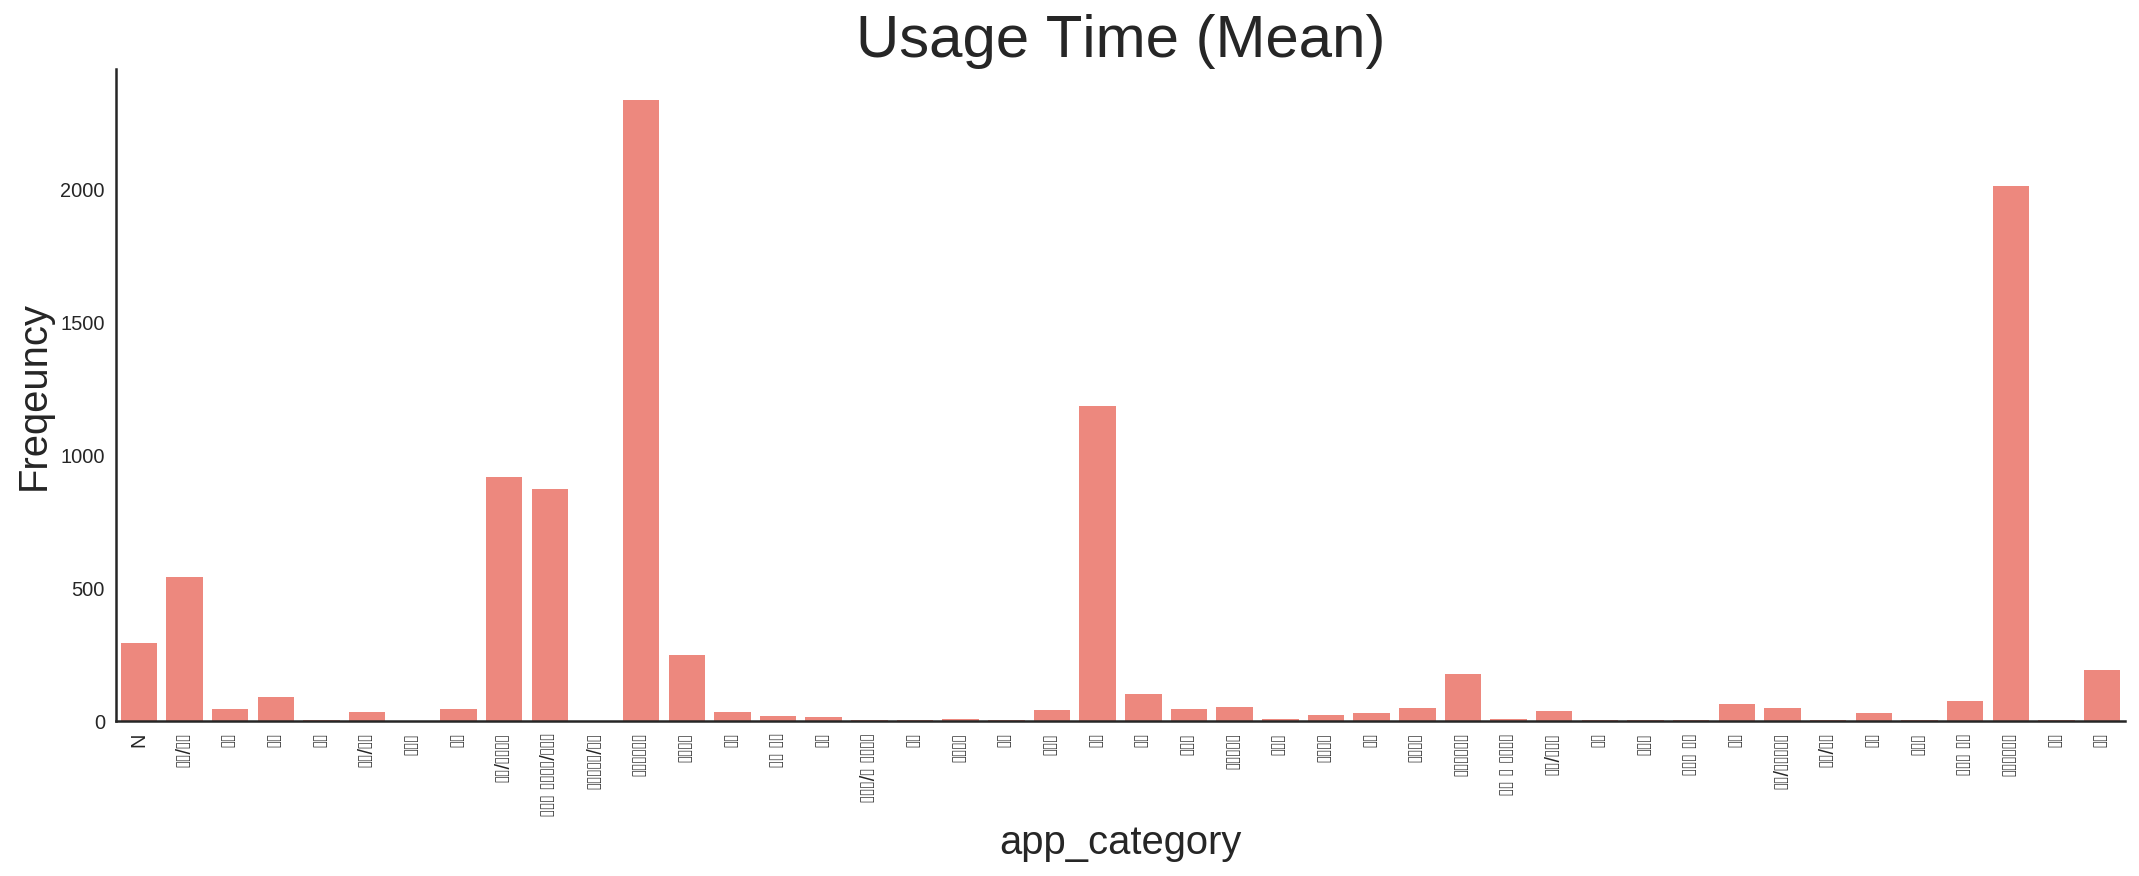

In [87]:
main_cat_freq = target_main_cat.groupby('app_category').count()

plt.figure(figsize=(18,6))
plt.xlabel('Usage Time (Mean)', fontsize=20)
plt.ylabel('Freqeuncy', fontsize=20)
plt.title('Usage Time (Mean)', fontsize=30)
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 
plt.xticks(rotation=90)

sns.barplot(x=main_cat_freq.panel_id.index, y=main_cat_freq.panel_id.values,  color='#ff796c')
sns.despine()

plt.show()

In [88]:
target_main_cat['app_category'] = target_main_cat['app_category'].map(lambda x: x if x in ['라이프스타일','커뮤니케이션','소셜','도서/참고자료','동영상 플레이어/편집기','건강/운동']
                                   else '게임' if x in ['롤플레잉','퍼즐','캐주얼 게임','전략','시뮬레이션','어드벤처','카드','아케이드','액션','자동차 경주']
                                   else '기타')


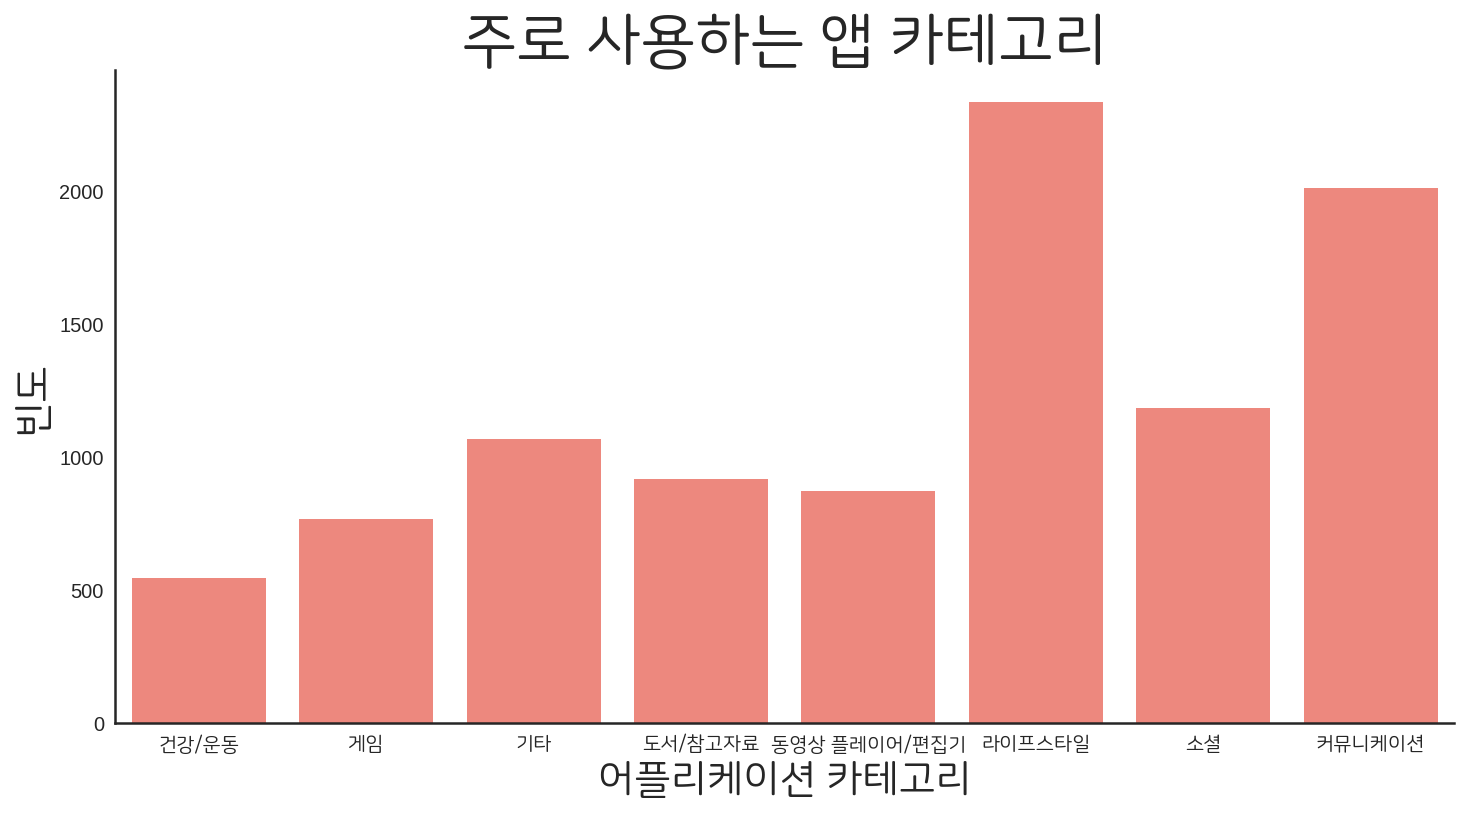

In [89]:
main_cat_freq = target_main_cat.groupby('app_category').count()

plt.figure(figsize=(12,6))
sns.barplot(x=main_cat_freq.panel_id.index, y=main_cat_freq.panel_id.values,  color='#ff796c')
sns.despine()

plt.xlabel('어플리케이션 카테고리', fontproperties=fontprop, fontsize=20)
plt.ylabel('빈도', fontproperties=fontprop, fontsize=20)
plt.title('주로 사용하는 앱 카테고리', fontproperties=fontprop, fontsize=30)
plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=10) 
plt.xticks(fontproperties=fontprop)

plt.show()

In [90]:
target_main_cat = pd.get_dummies(data = target_main_cat, columns = ['app_category'], prefix='app_category')
target_main_cat.head()

,panel_id,app_category_건강/운동,app_category_게임,app_category_기타,app_category_도서/참고자료,app_category_동영상 플레이어/편집기,app_category_라이프스타일,app_category_소셜,app_category_커뮤니케이션
15,A0002542,0,0,0,0,0,0,0,1
17,A0003204,1,0,0,0,0,0,0,0
44,A0003696,0,0,0,0,0,1,0,0
69,A0003768,0,0,0,0,0,0,0,1
76,A0008228,0,0,0,0,0,1,0,0


<br>
<br>
<br>
<br>

## 앱 사용 패턴을 아래와 같이 간단하게 정리!
<br>


In [91]:
target_app_count_finaldf = target_app_count.merge(target_app_mean, how='left', on='panel_id')
target_app_count_finaldf = target_app_count_finaldf.merge(target_app_count_gap, how='left', on='panel_id')
target_app_count_finaldf = target_app_count_finaldf.merge(target_usage_time_mean, how='left', on='panel_id')
target_app_count_finaldf = target_app_count_finaldf.merge(target_main_cat, how='left', on='panel_id')

In [92]:
target_app_count_finaldf.head()

,panel_id,app_counted,app_count_mean,App_num_gap_20.0,App_num_gap_30.0,App_num_gap_40.0,App_num_gap_50.0,App_num_gap_60.0,App_num_gap_less10,App_num_gap_more70,Usage_time_mean_30.0,Usage_time_mean_40.0,Usage_time_mean_50.0,Usage_time_mean_60.0,Usage_time_mean_70.0,Usage_time_mean_80.0,Usage_time_mean_90.0,Usage_time_mean_100to200,Usage_time_mean_less20,Usage_time_mean_more200,app_category_건강/운동,app_category_게임,app_category_기타,app_category_도서/참고자료,app_category_동영상 플레이어/편집기,app_category_라이프스타일,app_category_소셜,app_category_커뮤니케이션
0,A0002542,52,36.9,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
1,A0003204,59,30.2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0
2,A0003696,113,70.5,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
3,A0003768,74,28.5,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,A0008228,98,53.9,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0


In [ ]:
list(target_app_count_finaldf.columns)

<br>
<br>
<br>
<br>
<br>
# usage_sum_time_notzero

## AR분석을 위한 앱데이터

### 분석대상 앱 더미화

기준? 10주 내 최소 2회 이상 사용한 앱

---

In [93]:
# 1차로 앱 갯수 한번 거르기

once_used_df = target_notzero.drop_duplicates(subset=['panel_id','app_name'])

app_freq = once_used_df['app_name'].value_counts().reset_index()
app_freq.columns = ['app_name','counted']
app_freq = app_freq[lambda x: x.counted >= 500]

target_app = target_notzero.merge(app_freq, how='left', on='app_name')
target_app = target_app[lambda x: x.counted.notnull()]

In [94]:
# 1차로 걸러진 앱 276개

target_app['app_name'].nunique()

276

In [95]:
target_app['app_name'].unique()

array(['스팸배달부', 'AhnLab V3 Mobile Plus 2.0', '카카오버스', '쿠팡', '패널파워',
       'Facebook', '드라이브', 'Google', 'YouTube', '나만의냉장고', 'i-ONE뱅크',
       'Instagram', '카카오톡', '카카오 T', '카카오뱅크', '케이뱅크', '리브메이트', 'KB스타뱅킹',
       '고객센터', '카카오내비', 'Papago', 'BAND', '네이버 블로그', 'S노트', '계산기',
       '삼성 인터넷', '갤러리', '신한 쏠(SOL)', 'OK Cashbag', '원터치개인', '카카오지하철',
       'NH뱅킹', '캐시슬라이드', '캐시워크', 'CGV', 'G마켓', '11번가', '배달요기요', '홈&쇼핑',
       '오베이', 'KB스타알림', '더퀴즈라이브', '네이버 지도', 'NAVER', '신한카드', 'T전화', '당근마켓',
       '이마트몰', 'ISP/페이북', 'AhnLab V3 Mobile Security', 'Chrome', '컬쳐랜드',
       '싸이메라', '옥션', '지구', 'Messenger', '지도', '포토', 'Gmail', '해피포인트',
       'MobileCX', '아이엠스쿨', 'Polaris Office', '롯데마트몰', 'L.POINT', '라임',
       '네이트', '네이버 사전', 'Samsung Pay', '내 파일', '오락', 'Syrup 월렛',
       '모바일 T world', 'T 가드', '홈플러스', '컬러노트', '티몬', '트위터', '틸리언', '원터치알림',
       '예스24 도서', '예스24 NEB', 'GS&POINT', '하나멤버스', 'CJ ONE', '서베이링크',
       '뮤직메이트', 'SBS고릴라', '정원e샵', 'KEB 하나은행', '롯데닷컴', '롯데슈퍼', 'PAYCO',
       '배

In [96]:
target_app_freq_matrix = \
    target_app.groupby(['panel_id','app_name'])['reg_cnt'].count().reset_index().set_index(['panel_id','app_name']).unstack()
target_app_freq_matrix.columns = target_app_freq_matrix.columns.droplevel()  
target_app_freq_matrix = target_app_freq_matrix.reset_index().fillna(0)

In [97]:
target_app_count_gap.head()
target_usage_time_mean.head()
cat_usage.head()
target_app_freq_matrix.head()

app_name,panel_id,11번가,4shared,AfreecaTV,AhnLab V3 Mobile Plus 2.0,AhnLab V3 Mobile Security,B612,BAND,CGV,CJ ONE,CJmall,CJ대한통운 택배,CJ온마트,CLiP,Chrome,Clean Master,Cyworld,Excel,Facebook,Foodie,GS SHOP,GS&POINT,Gmail,Google,Google Play 게임,Google Play 무비,Google Play 뮤직,G마켓,H.Point,ISP/페이북,Instagram,JAM Live,KB국민카드,KB스마트원 통합인증,KB스타뱅킹,KB스타알림,KB앱카드,KEB 하나은행,KT 멤버십,KT 인증,KT 패밀리박스,L.POINT,L.pay,LINE,MG새마을금고,MONEY TREE,MX 플레이어,Melon,Messenger,MobileCX,MyNB,NAVER,NH뱅킹,NH스마트인증,NH콕뱅크,NS홈쇼핑,NotiToMe,OK Cashbag,OK캐쉬백 락;樂,OneDrive,PAYCO,POOQ,PUBG MOBILE,Papago,Photo Wonder,Polaris Office,PowerPoint,SBS고릴라,SC제일은행,SNOW,SR 고속열차,SSG.COM,SSGPAY,Samsung Health,Samsung Members,Samsung Music,Samsung Notes,Samsung Pay,Skyscanner,Smart Switch,Smart?Things,Syrup 월렛,S노트,S알리미,T map,T 가드,The Day Before,T라이프,T멤버십,T연락처,T인증,T전화,U+ 고객센터,U+멤버스,U+인증,V-Guard for Web,Word,YouTube,ZZAL,i-ONE뱅크,mVaccine for web,oksusu,갤러리,계산기,고객센터,고속버스 모바일,국세청 홈택스,기프티콘,나만의냉장고,내 캘린더,내 파일,네이버 메모,네이버 메일,네이버 뮤직,네이버 블로그,네이버 사전,네이버 오피스,네이버 웹툰,네이버 지도,네이버 카페,네이버 캘린더,네이버 클라우드,네이버TV,네이트,다음,다음 웹툰,다음카페,당근마켓,더퀴즈라이브,더현대닷컴,두잇서베이,드라이브,디바이스 관리,똑똑가계부,똑똑계산기,라임,롭스,롯데닷컴,롯데리아,롯데마트몰,롯데슈퍼,롯데시네마,롯데카드,롯데홈쇼핑,리브,리브메이트,메가박스,모바일 T world,모바일 팩스,모아락,뮤직메이트,미세미세,방치타임,배달요기요,배달의민족,배달통,배틀그라운드,버즈스크린 with 하나머니,번개장터,번역,보안 폴더,뷰티포인트,비디오,비디오포털,빗썸,사람인,삼성 인터넷,삼성앱카드,삼성카드,서베이링크,세븐일레븐,스마트택배,스타벅스,스팸배달부,스프레드시트,신한 쏠(SOL),신한카드,싸이메라,아모레퍼시픽 몰,아이엠스쿨,아임쇼핑,알라딘,알바몬,알바천국,알약M,앱프리,야놀자,업비트,엘롯데,여기어때,예스24 NEB,예스24 도서,오락,오베이,옥션,올레 tv 모바일,올리브영,요금안내서 Bill Letter,우리카드,원내비,원더락,원터치개인,원터치알림,위메프,위비멤버스,위비톡,위포인트,음성 녹음,이디야멤버스,이마트,이마트몰,이메일,인터파크,인터파크 도서,인터파크 투어,잡코리아,정원e샵,중고나라,지구,지그재그,지니 뮤직,지도,지하철종결자,직방,카카오 T,카카오내비,카카오맵,카카오뱅크,카카오버스,카카오스토리,카카오지하철,카카오톡,카카오톡 치즈,카카오페이지,캐시슬라이드,캐시슬라이드 스텝업,캐시워크,캐시카우,캔디 카메라,캣크러시,컬러노트,컬쳐락,컬쳐랜드,케이뱅크,코레일톡,쿠차,쿠팡,키즈노트,택배파인더,토스,트위터,티몬,틸리언,패널나우,패널락,패널파워,포토,핀크,핑크다이어리,하나1Q페이,하나멤버스,하나카드,하이마트,한컴오피스 viewer,해피머니,해피스크린,해피포인트,허니스크린,현대Hmall,현대카드,현대해상,홈&쇼핑,홈쇼핑모아,홈플러스,화해,후스콜,후후
0,A0002542,0.0,0.0,0.0,5.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,10.0,0.0,0.0,10.0,10.0,7.0,0.0,1.0,0.0,7.0,0.0,4.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,9.0,10.0,9.0,10.0,10.0,0.0,7.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,10.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0
1,A0003204,7.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0,0.0,0.0,9.0,0.0,1.0,0.0,0.0,0.0,0.0,10.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0,4.0,0.0,4.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,10.0,0.0,0.0,10.0,0.0,10.0,0.0,0.0,0.0,0.0,0

In [98]:
DA_target_app = (
target_app_count_gap.merge(target_usage_time_mean, how='left', on='panel_id')
    .merge(cat_usage, how='left', on='panel_id')
    .merge(target_app_freq_matrix, how='left', on='panel_id')
)

In [99]:
DA_target_app.to_csv('DA_target_app.csv', index=False)

In [100]:
target_app = target_app[['panel_id','reg_cnt','app_name']]
target_app_count = target_app.groupby(['panel_id','app_name']).count().reset_index()
target_app = target_app.merge(target_app_count, how='left', on=['panel_id','app_name'])

target_app = target_app[lambda x: x.reg_cnt_y > 1]
target_app = target_app.drop_duplicates(subset=['panel_id','app_name'])[['panel_id','app_name']]

target_app_matrix = target_app.set_index(['panel_id','app_name']).assign(value = 1).unstack().fillna(0)

target_app_matrix = target_app_matrix.reset_index()
target_app_matrix.columns = target_app_matrix.columns.droplevel(level=0)
del target_app_matrix.columns.name
target_app_matrix = target_app_matrix.rename(columns = {'' : 'panel_id'})

In [101]:
target_app_matrix.head()

,panel_id,11번가,4shared,AfreecaTV,AhnLab V3 Mobile Plus 2.0,AhnLab V3 Mobile Security,B612,BAND,CGV,CJ ONE,CJmall,CJ대한통운 택배,CJ온마트,CLiP,Chrome,Clean Master,Cyworld,Excel,Facebook,Foodie,GS SHOP,GS&POINT,Gmail,Google,Google Play 게임,Google Play 무비,Google Play 뮤직,G마켓,H.Point,ISP/페이북,Instagram,JAM Live,KB국민카드,KB스마트원 통합인증,KB스타뱅킹,KB스타알림,KB앱카드,KEB 하나은행,KT 멤버십,KT 인증,KT 패밀리박스,L.POINT,L.pay,LINE,MG새마을금고,MONEY TREE,MX 플레이어,Melon,Messenger,MobileCX,MyNB,NAVER,NH뱅킹,NH스마트인증,NH콕뱅크,NS홈쇼핑,NotiToMe,OK Cashbag,OK캐쉬백 락;樂,OneDrive,PAYCO,POOQ,PUBG MOBILE,Papago,Photo Wonder,Polaris Office,PowerPoint,SBS고릴라,SC제일은행,SNOW,SR 고속열차,SSG.COM,SSGPAY,Samsung Health,Samsung Members,Samsung Music,Samsung Notes,Samsung Pay,Skyscanner,Smart Switch,Smart?Things,Syrup 월렛,S노트,S알리미,T map,T 가드,The Day Before,T라이프,T멤버십,T연락처,T인증,T전화,U+ 고객센터,U+멤버스,U+인증,V-Guard for Web,Word,YouTube,ZZAL,i-ONE뱅크,mVaccine for web,oksusu,갤러리,계산기,고객센터,고속버스 모바일,국세청 홈택스,기프티콘,나만의냉장고,내 캘린더,내 파일,네이버 메모,네이버 메일,네이버 뮤직,네이버 블로그,네이버 사전,네이버 오피스,네이버 웹툰,네이버 지도,네이버 카페,네이버 캘린더,네이버 클라우드,네이버TV,네이트,다음,다음 웹툰,다음카페,당근마켓,더퀴즈라이브,더현대닷컴,두잇서베이,드라이브,디바이스 관리,똑똑가계부,똑똑계산기,라임,롭스,롯데닷컴,롯데리아,롯데마트몰,롯데슈퍼,롯데시네마,롯데카드,롯데홈쇼핑,리브,리브메이트,메가박스,모바일 T world,모바일 팩스,모아락,뮤직메이트,미세미세,방치타임,배달요기요,배달의민족,배달통,배틀그라운드,버즈스크린 with 하나머니,번개장터,번역,보안 폴더,뷰티포인트,비디오,비디오포털,빗썸,사람인,삼성 인터넷,삼성앱카드,삼성카드,서베이링크,세븐일레븐,스마트택배,스타벅스,스팸배달부,스프레드시트,신한 쏠(SOL),신한카드,싸이메라,아모레퍼시픽 몰,아이엠스쿨,아임쇼핑,알라딘,알바몬,알바천국,알약M,앱프리,야놀자,업비트,엘롯데,여기어때,예스24 NEB,예스24 도서,오락,오베이,옥션,올레 tv 모바일,올리브영,요금안내서 Bill Letter,우리카드,원내비,원더락,원터치개인,원터치알림,위메프,위비멤버스,위비톡,위포인트,음성 녹음,이디야멤버스,이마트,이마트몰,이메일,인터파크,인터파크 도서,인터파크 투어,잡코리아,정원e샵,중고나라,지구,지그재그,지니 뮤직,지도,지하철종결자,직방,카카오 T,카카오내비,카카오맵,카카오뱅크,카카오버스,카카오스토리,카카오지하철,카카오톡,카카오톡 치즈,카카오페이지,캐시슬라이드,캐시슬라이드 스텝업,캐시워크,캐시카우,캔디 카메라,캣크러시,컬러노트,컬쳐락,컬쳐랜드,케이뱅크,코레일톡,쿠차,쿠팡,키즈노트,택배파인더,토스,트위터,티몬,틸리언,패널나우,패널락,패널파워,포토,핀크,핑크다이어리,하나1Q페이,하나멤버스,하나카드,하이마트,한컴오피스 viewer,해피머니,해피스크린,해피포인트,허니스크린,현대Hmall,현대카드,현대해상,홈&쇼핑,홈쇼핑모아,홈플러스,화해,후스콜,후후
0,A0002542,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,A0003204,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [102]:
target_app_matrix = target_app_count_finaldf.merge(target_app_matrix, how='left', on=['panel_id'])

In [103]:
target_app_matrix.head()

,panel_id,app_counted,app_count_mean,App_num_gap_20.0,App_num_gap_30.0,App_num_gap_40.0,App_num_gap_50.0,App_num_gap_60.0,App_num_gap_less10,App_num_gap_more70,Usage_time_mean_30.0,Usage_time_mean_40.0,Usage_time_mean_50.0,Usage_time_mean_60.0,Usage_time_mean_70.0,Usage_time_mean_80.0,Usage_time_mean_90.0,Usage_time_mean_100to200,Usage_time_mean_less20,Usage_time_mean_more200,app_category_건강/운동,app_category_게임,app_category_기타,app_category_도서/참고자료,app_category_동영상 플레이어/편집기,app_category_라이프스타일,app_category_소셜,app_category_커뮤니케이션,11번가,4shared,AfreecaTV,AhnLab V3 Mobile Plus 2.0,AhnLab V3 Mobile Security,B612,BAND,CGV,CJ ONE,CJmall,CJ대한통운 택배,CJ온마트,CLiP,Chrome,Clean Master,Cyworld,Excel,Facebook,Foodie,GS SHOP,GS&POINT,Gmail,Google,Google Play 게임,Google Play 무비,Google Play 뮤직,G마켓,H.Point,ISP/페이북,Instagram,JAM Live,KB국민카드,KB스마트원 통합인증,KB스타뱅킹,KB스타알림,KB앱카드,KEB 하나은행,KT 멤버십,KT 인증,KT 패밀리박스,L.POINT,L.pay,LINE,MG새마을금고,MONEY TREE,MX 플레이어,Melon,Messenger,MobileCX,MyNB,NAVER,NH뱅킹,NH스마트인증,NH콕뱅크,NS홈쇼핑,NotiToMe,OK Cashbag,OK캐쉬백 락;樂,OneDrive,PAYCO,POOQ,PUBG MOBILE,Papago,Photo Wonder,Polaris Office,PowerPoint,SBS고릴라,SC제일은행,SNOW,SR 고속열차,SSG.COM,SSGPAY,Samsung Health,Samsung Members,Samsung Music,Samsung Notes,Samsung Pay,Skyscanner,Smart Switch,Smart?Things,Syrup 월렛,S노트,S알리미,T map,T 가드,The Day Before,T라이프,T멤버십,T연락처,T인증,T전화,U+ 고객센터,U+멤버스,U+인증,V-Guard for Web,Word,YouTube,ZZAL,i-ONE뱅크,mVaccine for web,oksusu,갤러리,계산기,고객센터,고속버스 모바일,국세청 홈택스,기프티콘,나만의냉장고,내 캘린더,내 파일,네이버 메모,네이버 메일,네이버 뮤직,네이버 블로그,네이버 사전,네이버 오피스,네이버 웹툰,네이버 지도,네이버 카페,네이버 캘린더,네이버 클라우드,네이버TV,네이트,다음,다음 웹툰,다음카페,당근마켓,더퀴즈라이브,더현대닷컴,두잇서베이,드라이브,디바이스 관리,똑똑가계부,똑똑계산기,라임,롭스,롯데닷컴,롯데리아,롯데마트몰,롯데슈퍼,롯데시네마,롯데카드,롯데홈쇼핑,리브,리브메이트,메가박스,모바일 T world,모바일 팩스,모아락,뮤직메이트,미세미세,방치타임,배달요기요,배달의민족,배달통,배틀그라운드,버즈스크린 with 하나머니,번개장터,번역,보안 폴더,뷰티포인트,비디오,비디오포털,빗썸,사람인,삼성 인터넷,삼성앱카드,삼성카드,서베이링크,세븐일레븐,스마트택배,스타벅스,스팸배달부,스프레드시트,신한 쏠(SOL),신한카드,싸이메라,아모레퍼시픽 몰,아이엠스쿨,아임쇼핑,알라딘,알바몬,알바천국,알약M,앱프리,야놀자,업비트,엘롯데,여기어때,예스24 NEB,예스24 도서,오락,오베이,옥션,올레 tv 모바일,올리브영,요금안내서 Bill Letter,우리카드,원내비,원더락,원터치개인,원터치알림,위메프,위비멤버스,위비톡,위포인트,음성 녹음,이디야멤버스,이마트,이마트몰,이메일,인터파크,인터파크 도서,인터파크 투어,잡코리아,정원e샵,중고나라,지구,지그재그,지니 뮤직,지도,지하철종결자,직방,카카오 T,카카오내비,카카오맵,카카오뱅크,카카오버스,카카오스토리,카카오지하철,카카오톡,카카오톡 치즈,카카오페이지,캐시슬라이드,캐시슬라이드 스텝업,캐시워크,캐시카우,캔디 카메라,캣크러시,컬러노트,컬쳐락,컬쳐랜드,케이뱅크,코레일톡,쿠차,쿠팡,키즈노트,택배파인더,토스,트위터,티몬,틸리언,패널나우,패널락,패널파워,포토,핀크,핑크다이어리,하나1Q페이,하나멤버스,하나카드,하이마트,한컴오피스 viewer,해피머니,해피스크린,해피포인트,허니스크린,현대Hmall,현대카드,현대해상,홈&쇼핑,홈쇼핑모아,홈플러스,화해,후스콜,후후
0,A0002542,52,36.9,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,A0003204,59,30.2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [104]:
target_app_matrix.to_csv("AR_target_app.csv", index=False)

<br>
<br>
<br>
<br>
<br>
## 카테고리별 앱의 수 관찰

---

In [105]:
once_used_df = target_notzero.drop_duplicates(subset=['panel_id','app_name'])

app_freq = once_used_df['app_name'].value_counts().reset_index()
app_freq.columns = ['app_name','counted']
app_freq = app_freq[lambda x: x.counted >= 500]

target_app = target_notzero.merge(app_freq, how='left', on='app_name')
target_app = target_app[lambda x: x.counted.notnull()]

target_app_cat = target_app.drop_duplicates(subset=['app_name','app_category'])[['app_name','app_category']]

In [106]:
target_app_cat.head()

,app_name,app_category
8,스팸배달부,N
19,AhnLab V3 Mobile Plus 2.0,도구
20,카카오버스,지도/내비게이션
22,쿠팡,쇼핑
23,패널파워,라이프스타일


In [107]:
# 276개가 아님, 카테코리가 겹치는게 있다?

len(target_app_cat)

283

In [108]:
# 직접 적절한 카테고리로 수정

cat_2_list = list(target_app_cat.groupby('app_name')['app_category'].count()[lambda x: x>1].index)
cat_2_df = target_app_cat[lambda x: x.app_name.isin(cat_2_list)].groupby('app_name')['app_category'].unique().reset_index()
cat_2_df.head()

,app_name,app_category
0,Polaris Office,"[생산성, 비즈니스]"
1,갤러리,"[사진, 동영상 플레이어/편집기, 도구]"
2,계산기,"[도구, 생산성, 라이프스타일]"
3,고객센터,"[라이프스타일, 비즈니스]"
4,내 파일,"[생산성, 도구]"


In [109]:
cat_2_df['app_category'] = ['생산성','사진','도구','비즈니스','도구']
cat_2_df.head()

,app_name,app_category
0,Polaris Office,생산성
1,갤러리,사진
2,계산기,도구
3,고객센터,비즈니스
4,내 파일,도구


In [110]:
# 카테고리 정리 완료

target_app_cat = pd.concat([cat_2_df,target_app_cat]).drop_duplicates(['app_name'])
len(target_app_cat)

276

In [113]:
# 같은 카테고리 내 경쟁관계를 파악하기에 충분한 갯수일까?
app_cat = target_app_cat.groupby('app_category').count().sort_values(by=['app_name'],ascending=False)

In [116]:
app_cat = app_cat.reset_index()

In [117]:
app_cat.head()

,app_category,app_name
0,라이프스타일,50
1,금융,44
2,쇼핑,36
3,생산성,19
4,도구,15


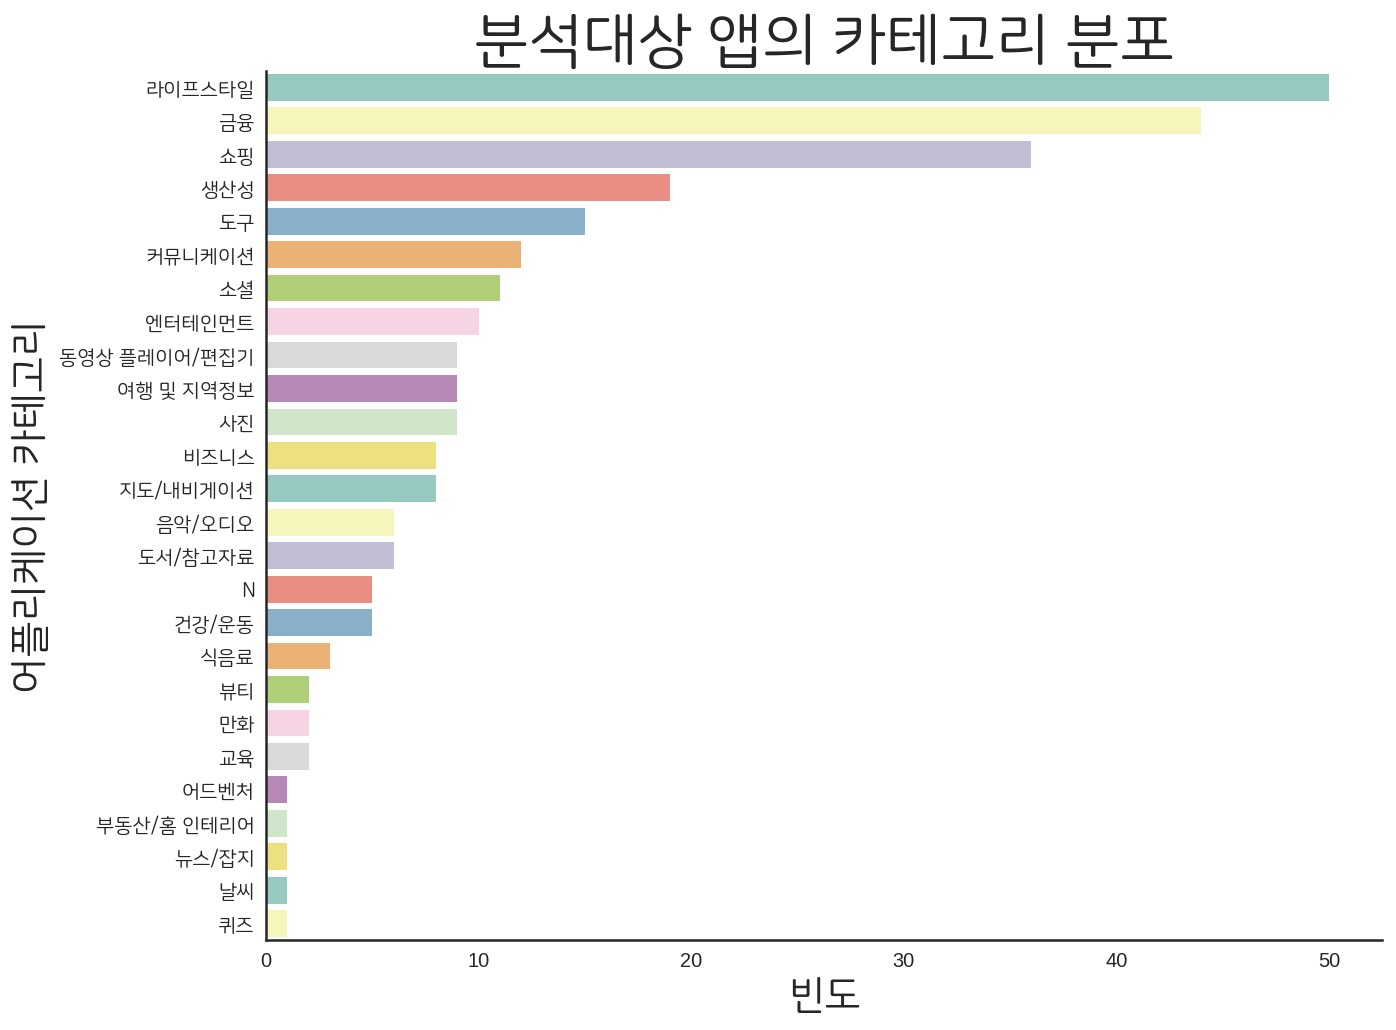

In [128]:

plt.figure(figsize=(10,8))
sns.barplot(x='app_name', y='app_category', data=app_cat, palette='Set3')
sns.despine()

plt.xlabel('빈도', fontproperties=fontprop, fontsize=20)
plt.ylabel('어플리케이션 카테고리', fontproperties=fontprop, fontsize=20)
plt.title('분석대상 앱의 카테고리 분포', fontproperties=fontprop, fontsize=30)
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=15) 
plt.yticks(fontproperties=fontprop)

plt.show()

In [112]:
target_app_cat.to_csv("target_app_cat.csv", index=False)